In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse

import os

mpl.rcParams['figure.dpi'] = 300

In [2]:
samples = {}

for file in os.listdir("./") :
    
    if file.endswith(".clusters.LOH.pkl.bz2") :
        s = file.split(".")
        samples[s[0]] = os.path.abspath(file)

for sm, cluster_file in samples.items() :
    print(sm, cluster_file)

D4A3 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/D4A3.clusters.LOH.pkl.bz2
P0_C9_E4 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/P0_C9_E4.clusters.LOH.pkl.bz2
30H_C36_E5 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/30H_C36_E5.clusters.LOH.pkl.bz2
D5C3 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/D5C3.clusters.LOH.pkl.bz2
P250_C17_E4 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/P250_C17_E4.clusters.LOH.pkl.bz2
H2B4 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/H2B4.clusters.LOH.pkl.bz2
P0_C9_E5 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/P0_C9_E5.clusters.LOH.pkl.bz2
D2B3 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/D2B3.clusters.LOH.pkl.bz2
D3A3 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/D3A3.clusters.LOH.pkl.bz2
D3A1 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/D3A1.clusters.LOH.pkl.bz2
P500_C30_E3 /media/urbe/MyADrive1/Antoine/2023-08-28_Analysis_GR_ME/P500_C30_E3.clusters

In [3]:
sample_exp = {
    "D2A1": "ME",
    "D3A1": "ME",
    "D4A3": "ME",
    "D5B3": "ME",
    "D2B3": "ME", # has a 50G
    "D5C3": "ME", # has a 50G
    "D2C1": "ME", # has a 50G
    "D2C3": "ME", # has a 50G
    "D3A3": "ME",  # has a 50G
    "D4B4": "ME", # has a 50G
    "D5C1": "ME", # has a 50G
    "H2A3": "ME",
    "H2C3": "ME",
    "H4C2": "ME",
    "H5A3": "ME",
    "H4A4": "ME", # has a 50G
    "H5A2": "ME", # has a 50G
    "H2B4": "ME", # has a 50G
    "H3A4": "ME", # has a 50G
    "H3C4": "ME", # has a 50G
    "H5A4": "ME", # has a 50G
    "H5C2": "ME", # has a 50G
    "30H_C36_E5": "GR",
    "30H_C3_E5":  "GR",
    "30H_C48_E5": "GR",
    "30H_C3_E4":  "GR",
    "30D_C52_E5": "GR",
    "30D_C38_E4": "GR",
    "30D_C13_E3": "GR",
    "30D_C38_E5": "GR",
    "P0_C27_E5":  "GR",
    "P0_C9_E5":   "GR",
    "P0_C9_E4":   "GR",
    "P0_C40_E5":  "GR",
    "P100_C8_E4": "GR",
    "P100_C30_E4":"GR",
    "P100_C8_E3": "GR",
    "P100_C30_E3":"GR",
    "P250_C8_E3": "GR",
    "P250_C17_E4":"GR",
    "P250_C8_E4": "GR",
    "P250_C17_E3":"GR",
    "P500_C16_E5":"GR",
    "P500_C16_E4":"GR",
    "P500_C30_E3":"GR",
    "P500_C18_E3":"GR",
}

generations = {
    "D2A1": 86,
    "D3A1": 87,
    "D4A3": 82,
    "D5B3": 83,
    "D2B3": 84, # has a 50G
    "D5C3": 81, # has a 50G
    "D2C1": 79, # has a 50G
    "D2C3": 75, # has a 50G
    "D3A3": 84,  # has a 50G
    "D4B4": 87, # has a 50G
    "D5C1": 79, # has a 50G
    "H2A3": 117,
    "H2C3": 122,
    "H4C2": 128,
    "H5A3": 128,
    "H4A4": 118, # has a 50G
    "H5A2": 132, # has a 50G
    "H2B4": 119, # has a 50G
    "H3A4": 129, # has a 50G
    "H3C4": 133, # has a 50G
    "H5A4": 131, # has a 50G
    "H5C2": 125, # has a 50G
    "30H_C36_E5": 1,
    "30H_C3_E5":  1,
    "30H_C48_E5": 1,
    "30H_C3_E4":  1,
    "30D_C52_E5": 1,
    "30D_C38_E4": 1,
    "30D_C13_E3": 1,
    "30D_C38_E5": 1,
    "P0_C27_E5":  1,
    "P0_C9_E5":   1,
    "P0_C9_E4":   1,
    "P0_C40_E5":  1,
    "P100_C8_E4": 1,
    "P100_C30_E4":1,
    "P100_C8_E3": 1,
    "P100_C30_E3":1,
    "P250_C8_E3": 1,
    "P250_C17_E4":1,
    "P250_C8_E4": 1,
    "P250_C17_E3":1,
    "P500_C16_E5":1,
    "P500_C16_E4":1,
    "P500_C30_E3":1,
    "P500_C18_E3":1,
}

sample_cond = {
    "30H_C36_E5": "30H",
    "30H_C3_E5":  "30H",
    "30H_C48_E5": "30H",
    "30H_C3_E4":  "30H",
    "30D_C52_E5": "30D",
    "30D_C38_E4": "30D",
    "30D_C13_E3": "30D",
    "30D_C38_E5": "30D",
    "P0_C27_E5":  "0Gy",
    "P0_C9_E5":   "0Gy",
    "P0_C9_E4":   "0Gy",
    "P0_C40_E5":  "0Gy",
    "P100_C8_E4": "100Gy",
    "P100_C30_E4":"100Gy",
    "P100_C8_E3": "100Gy",
    "P100_C30_E3":"100Gy",
    "P250_C8_E3": "250Gy",
    "P250_C17_E4":"250Gy",
    "P250_C8_E4": "250Gy",
    "P250_C17_E3":"250Gy",
    "P500_C16_E5":"500Gy",
    "P500_C16_E4":"500Gy",
    "P500_C30_E3":"500Gy",
    "P500_C18_E3":"500Gy",
    "D4A3": "D", # MA
    "D2B3": "D",
    "D5B3": "D",
    "D3A1": "D",
    "D2A1": "D",
    "D5C3": "D",
    "D2C1": "D",
    "D2C3": "D",
    "D3A3": "D",
    "D4B4": "D",
    "D5C1": "D",
    "H2A3": "H",
    "H4A4": "H",
    "H2C3": "H",
    "H5A3": "H",
    "H4C2": "H",
    "H5A2": "H",
    "H2B4": "H",
    "H3A4": "H",
    "H3C4": "H",
    "H5A4": "H",
    "H5C2": "H",
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30H_del": (0.0,0.7,1.0,0.25), # turquoise
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "30D_del": (1.0,0.75,0.0,0.25), # orange
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "0Gy_del": (0.7,0.7,0.7,0.25), # lighter grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "100Gy_del": (1.0,0.0,0.8,0.25), # pinkish
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "250Gy_del": (0.0,1.0,0.0,0.25), # limegreen
    "500Gy": (1.0,0.0,0.0,0.8), # red
    "500Gy_del": (1.0,0.5,0.5,0.25), # pink
    "H": (0.0,0.0,1.0,0.8),
    "H_del": (0.0,0.7,1.0,0.25),
    "D": (1.0,0.25,0.0,0.8),
    "D_del": (1.0,0.75,0.0,0.25),
}

conditions_cmap = {
    "30H":cm.Blues,
    "30D":cm.Oranges,
    "0Gy":cm.Greys,
    "100Gy":cm.Purples,
    "250Gy":cm.Greens,
    "500Gy":cm.Reds,
    "H":cm.Blues,
    "D":cm.Oranges,
}

conditions_names = {
    "30H": "GR Hydrated",
    "30D": "GR Desiccated",
    "0Gy": "GR 0Gy IR",
    "100Gy": "GR 100Gy IR",
    "250Gy": "GR 250Gy IR",
    "500Gy": "GR 500Gy IR",
    "H": "ME Hydrated",
    "D": "ME Desiccated"
}

conditions_shape = {
    "30H": "o",
    "30D": "o",
    "0Gy": "o",
    "100Gy": "o",
    "250Gy": "o",
    "500Gy": "o",
    "H": "d",
    "D": "d"
}

# COVERAGE
median_coverage = {
    "ancestor": 341,
    "D2A1": 47,
    "D2B3": 264, # has a 50G
    "D2B3_50G": 408,
    "D2C1": 110, # has a 50G
    "D2C1_50G": 137,
    "D2C3": 106, # has a 50G
    "D2C3_50G": 118,
    "D3A1": 49,
    "D3A3": 105,  # has a 50G
    "D3A3_50G": 177,
    "D4A3": 54,
    "D4B4": 144, # has a 50G
    "D4B4_50G":176,
    "D5B3": 73,
    "D5C1": 120, # has a 50G
    "D5C1_50G": 127,
    "D5C3": 156, # has a 50G
    "D5C3_50G": 194,
    "H2A3": 449,
    "H2B4": 122, # has a 50G
    "H2B4_50G": 27, # LOW COVERAGE SAMPLE
    "H2C3": 148,
    "H3A4": 90, # has a 50G
    "H3A4_50G": 150,
    "H3C4": 127, # has a 50G
    "H3C4_50G": 111,
    "H4A4": 409, # has a 50G
    "H4A4_50G": 404,
    "H4C2": 204,
    "H5A2": 54, # has a 50G
    "H5A2_50G": 63,
    "H5A3": 202,
    "H5A4": 126, # has a 50G
    "H5A4_50G": 131,
    "H5C2": 148, # has a 50G
    "H5C2_50G": 165,
    
    "30H_C3_E4":  199,
    "30H_C3_E5":  209,
    "30H_C36_E5": 244,
    "30H_C48_E5": 275,
    
    "30D_C13_E3": 259,
    "30D_C38_E4": 193,
    "30D_C38_E5": 236,
    "30D_C52_E5": 208,
    
    "P0_C9_E4":   186,
    "P0_C9_E5":   174,
    "P0_C27_E5":  242,
    "P0_C40_E5":  192,
    
    "P100_C8_E3": 413,
    "P100_C8_E4": 431,
    "P100_C30_E3":424,
    "P100_C30_E4":490,
    
    "P250_C8_E3": 390,
    "P250_C8_E4": 334,
    "P250_C17_E3":354,
    "P250_C17_E4":435,
    
    "P500_C16_E4":185,
    "P500_C16_E5":187,
    "P500_C18_E3":291,
    "P500_C30_E3":275,
}

col_ME = (55/255, 126/255, 184/255)
col_ARC = (255/255, 127/255, 0/255)
col_TE = (152/255, 78/255, 163/255, 0.65)

# LENGTHS OF CHROMOSOMES
reference = "/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/input/reference.fa"
fai = "/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/input/reference.fa.fai"
lengths = {}
for line in open(fai, 'r') :
    s = line.strip().split()
    lengths[s[0]] = int(s[1])

# TELOMERES
telomeres = {
    "Chrom_1":([0,1500000], [11000000, 18146847]),
    "Chrom_2":([0,2000000], [15000000, 16274841]),
    "Chrom_3":([0,4000000], [13500000, 20354777]),
    "Chrom_4":([0,1000000], [14000000, 15224634]),
    "Chrom_5":([0,5000000], [15500000, 16930519]),
    "Chrom_6":([0,2000000], [12000000, 13893210]),
}

# POSITIONS OF GENES, CDS AND REPEATS 
genes = "/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/input/Avaga.genes.bed"
cds = "/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/input/Avaga.CDS.bed"
repeats = "/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/input/avaga.TEannotation.26-02-20.defragmentedDraftAnnot.bed"

# REPEATS DATAFRAME
reps = {"CHR":[], "START":[], "END":[]}
for line in open(repeats, "r") :
    s = line.strip().split("\t")
    reps["CHR"].append(s[0])
    reps["START"].append(int(s[1]))
    reps["END"].append(int(s[2]))
    
repdf = pd.DataFrame().from_dict(reps)

In [4]:
gene_df = pd.read_csv(genes, sep="\t", names=["CHR", "START", "END", "INFO"])
gene_df

,CHR,START,END,INFO
0,Chrom_1,2155,5638,gene
1,Chrom_1,9443,22451,gene
2,Chrom_1,31120,31192,gene
3,Chrom_1,37749,39478,gene
4,Chrom_1,40443,42340,gene
...,...,...,...,...
31577,Chrom_6,13878012,13879325,gene
31578,Chrom_6,13880772,13881455,gene
31579,Chrom_6,13881782,13882003,gene
31580,Chrom_6,13886437,13888282,gene


# Merging clusters informations:

- Min 25% of average coverage of the whole sample <- no LOH due to low coverage
- Max 2 samples sharing LOH on average
- If distance between 2 clusters <= 100 : **consider as only one cluster**
- Minimum 5 SNPs <- no LOH due to independent assortment

In [5]:
min_snps = 4 # < 4 <=> <= 5
min_cov_perc = 0.25
max_share = 2
max_distance_between_cluster = 100

all_clusters_merged = {}
all_dfs = {}

for sample, csr_f in samples.items() :
    
    df = pd.read_pickle(csr_f)
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    #clusters = df.loc[(df["SH", "mean"] < max_share) & (df["ODP", "mean"] >= min_cov_perc*median_coverage[sample]) & (df["GET", "first"] == "L")]
    mn_cv = min_cov_perc*median_coverage[sample]
    clusters = df.query("SH_mean < @max_share & ODP_mean >= @mn_cv & GET_first == 'L'")
    
    all_dfs[sample] = clusters
    
    gb = clusters.groupby(by="CHROM_first")
    
    modified = []
    for tup in gb :
        (i, cdf) = tup
        delta = []
        previous = None
        for n, row in cdf.iterrows() :
            if previous is not None :
                diff = row["POS_first"] - previous
                delta.append(diff)
                previous = row["POS_last"]
            else :
                delta.append(0)
                previous = row["POS_last"]
        cdf = cdf.assign(DELTA=delta)
        cdf["GROUP"] = cdf["DELTA"].gt(max_distance_between_cluster).cumsum()

        cdf = cdf.groupby("GROUP").agg({"CHROM_first":"first", "POS_first":"min", "POS_last":"max", "ADP_min":"min", "ADP_max":"max", "ADP_mean":"mean", "ODP_min":"min", "ODP_max":"max", "ODP_mean":"mean", "GET_first":"first","GET_size":"sum","SH_min":"min","SH_max":"max","SH_mean":"mean"})
        cdf = cdf.assign(SIZE=cdf.apply(lambda x: x["POS_last"]-x["POS_first"]+1, axis="columns"))
        modified.append(cdf)

    gdf = pd.concat(modified)
    gdf = gdf.assign(OPER=gdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    gdf = gdf.assign(APER=gdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    gdf = gdf.assign(DIFF=gdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    gdf = gdf.query("GET_size > @min_snps")
    all_clusters_merged[sample] = gdf

In [6]:
all_clusters_merged["H2B4"].query("CHROM_first == 'Chrom_6' & GET_size < 700") # & POS_first > 4000000")

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
5,Chrom_6,592227,592575,457,595,491.75,160,202,169.75,L,8,1,2,1.125,349,139.139344,144.208211,-5.068867
21,Chrom_6,3939697,3939787,357,390,375.6,108,117,111.05,L,16,1,1,1.0,91,91.024590,110.146628,-19.122037
24,Chrom_6,4519078,4519184,178,236,201.0,76,85,80.833333,L,6,1,2,1.666667,107,66.256831,58.944282,7.312549
35,Chrom_6,6135316,6135356,194,223,208.8,68,74,71.2,L,5,0,0,0.0,41,58.360656,61.231672,-2.871016
39,Chrom_6,7122186,7122269,280,291,284.714286,62,67,64.285714,L,7,1,2,1.285714,84,52.693208,83.493925,-30.800717
62,Chrom_6,12117085,12117129,143,154,149.75,67,77,74.0,L,6,0,0,0.0,45,60.655738,43.914956,16.740782
72,Chrom_6,13044536,13044612,195,237,228.111111,50,58,53.777778,L,9,1,7,1.777778,77,44.080146,66.894754,-22.814608
74,Chrom_6,13234698,13235045,79,205,132.304348,30,65,38.913043,L,23,1,2,1.043478,348,31.895937,38.798929,-6.902992
80,Chrom_6,13335149,13335195,92,96,93.727273,39,44,41.909091,L,12,0,3,1.318182,47,34.351714,27.486004,6.865710


In [7]:
all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first < 3500000") # & POS_first > 4000000")

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
5,Chrom_6,172238,194930,87,306,213.216627,26,192,104.366353,L,545,0,19,1.247843,22693,66.901508,62.526870,4.374638
7,Chrom_6,210951,214881,102,257,206.466667,69,132,102.571429,L,105,1,6,1.152381,3931,65.750916,60.547410,5.203506
9,Chrom_6,215270,218597,97,294,192.910714,79,119,102.517857,L,56,1,3,1.035714,3328,65.716575,56.572057,9.144518
10,Chrom_6,259681,265093,156,326,229.621762,69,141,108.476684,L,193,1,3,1.129534,5413,69.536336,67.337760,2.198576
11,Chrom_6,284080,284680,125,243,202.688312,87,112,101.090909,L,77,1,2,1.051948,601,64.801865,59.439388,5.362477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Chrom_6,2976834,2980464,63,353,267.478788,105,192,165.007576,L,73,0,3,1.0,3631,105.774087,78.439527,27.334560
226,Chrom_6,2980578,2983037,172,394,340.81746,133,269,233.396825,L,66,0,1,0.97619,2460,149.613350,99.946469,49.666880
228,Chrom_6,2985510,2986897,265,342,307.046512,127,196,155.069767,L,43,0,1,0.953488,1388,99.403697,90.042965,9.360732


In [8]:
all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first > 3100000 & POS_last < 4100000") # & POS_first > 4000000")

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
234,Chrom_6,3781928,3810511,201,362,297.201794,106,212,160.818386,L,446,0,12,1.085202,28584,103.088709,87.155951,15.932758
237,Chrom_6,3812724,3856854,133,388,284.924331,107,233,160.608847,L,859,0,3,0.990687,44131,102.954389,83.555522,19.398867
238,Chrom_6,3859401,3900004,109,454,294.836207,101,216,159.431034,L,696,1,2,1.005747,40604,102.199381,86.462231,15.737150


# Figure 1c (example only)

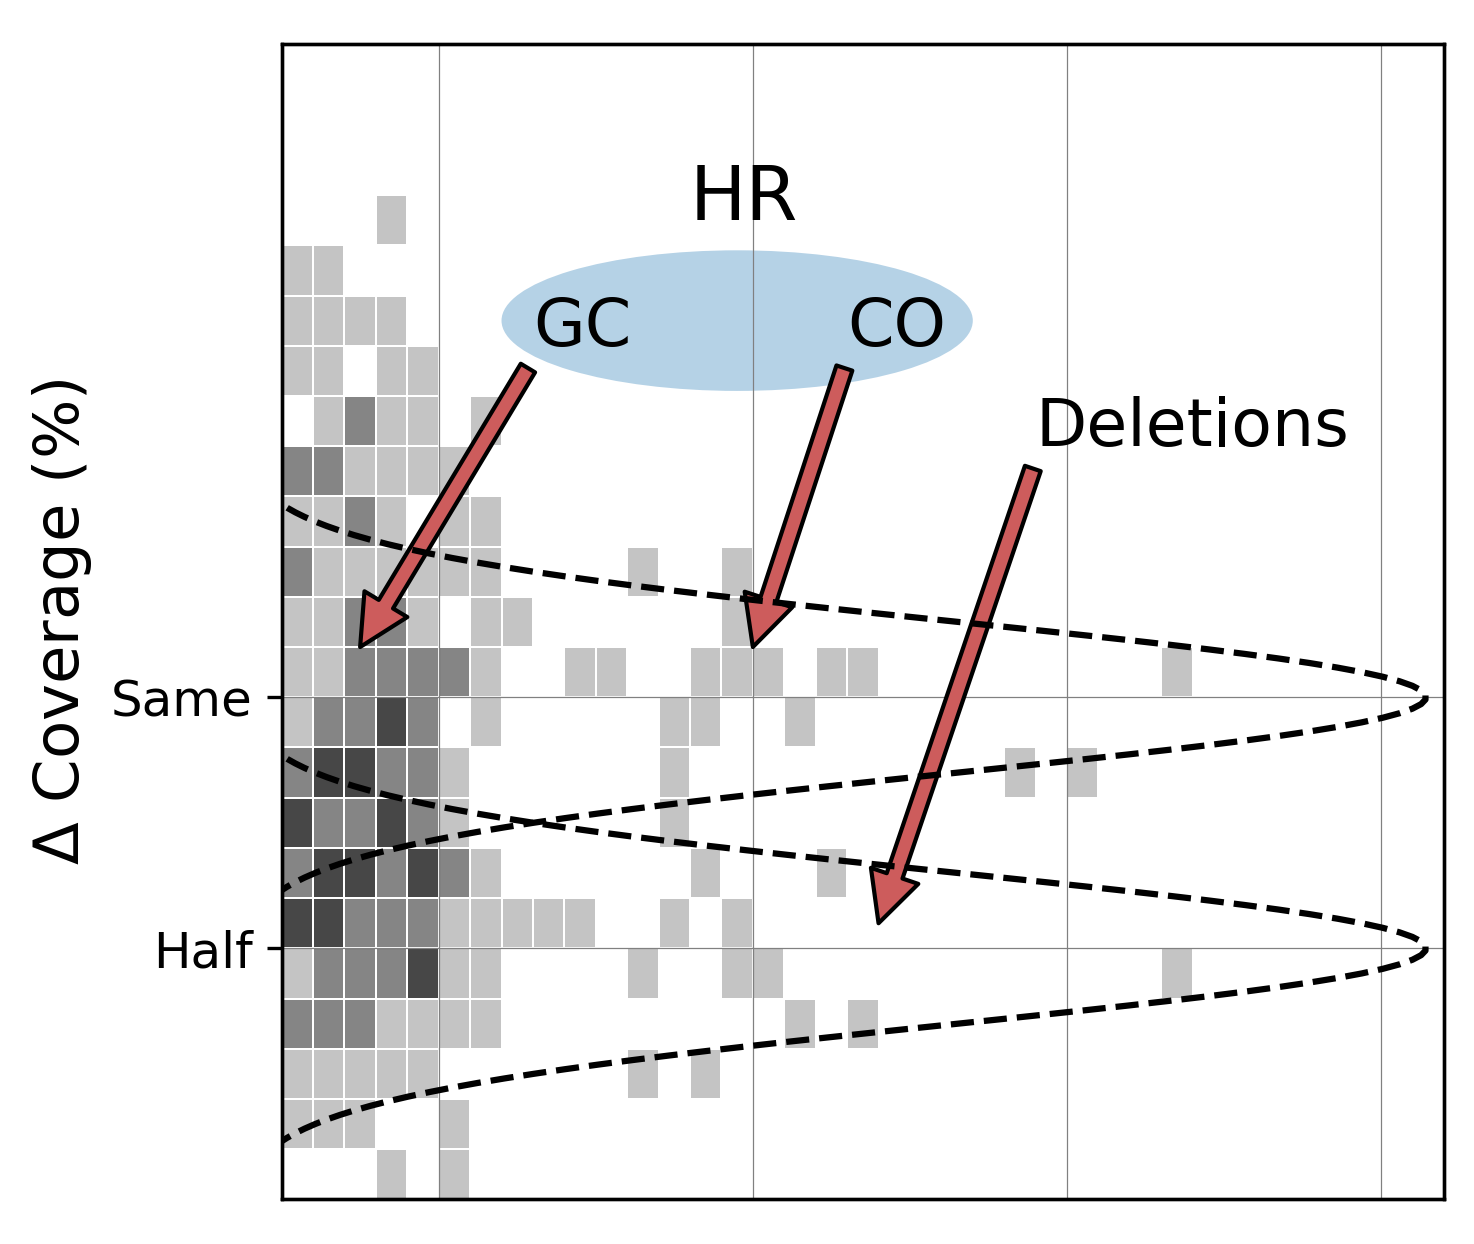

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5),)


ax2 = ax.twiny()

mu, sigma = 100, 15
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x = stats.norm.pdf(y, mu, sigma)
ax2.plot(x, y, color="k", lw=1.5, linestyle="--", zorder=2)
#ax2.fill_betweenx(y, x, 0, facecolor=(0/255, 158/255, 115/255, 0.3), lw=0.5, edgecolor=(0, 0, 0), label="HR")

mu, sigma = 50, 15
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x = stats.norm.pdf(y, mu, sigma)
ax2.plot(x, y, color="k", lw=1.5, linestyle="--", zorder=2)
#ax2.fill_betweenx(y, x, 0, facecolor=(204/255, 121/255, 167/255, 0.3), lw=0.5,edgecolor=(0, 0, 0), label="Deletions")

ax2.set_xlim(0.001, 0.027)
ax2.set_xticks([])

data_size = np.concatenate(
    [
        np.random.normal(0,5,600), np.random.normal(0,5,300),
        np.random.normal(5,100,20), np.random.normal(5,100,20),
        np.random.normal(1000,1000,2), np.random.normal(1000,1000,2)
    ]
)

data_percent = np.concatenate(
    [
        np.random.normal(100,35,600), np.random.normal(50,15,300),
        np.random.normal(100,15,20), np.random.normal(50,15,20),
        np.random.normal(100,15,2), np.random.normal(50,15,2)
    ]
)

data_size = abs(data_size)
data_percent = abs(data_percent)

cmap = plt.cm.Greys  # define the colormap
cmaplist = [cmap(i) for i in range(32, cmap.N)] # extract all colors from the .jet map
cmaplist[0] = (1.0, 1.0, 1.0, 1.0) # force the first color entry to be white
mycmap = mpl.colors.LinearSegmentedColormap.from_list('My cmap', cmaplist, cmap.N)
bounds = [0, 1, 5, 10, 50, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

counts, xedges, yedges, im = ax.hist2d(np.log10(data_size), data_percent,
                                       range=((0.5,4.2),(5,260)),
                                       bins=(np.arange(0.5,4.3,0.1),np.arange(0,260,10)),
                                       norm=norm, cmap=mycmap,
                                       ec="w", lw=0.1, zorder=1
                                       )

ax.set_ylim(0,230)
ax.set_yticks([50, 100])
ax.set_yticklabels(["Half","Same"], fontsize=12)
ax.set_ylabel(r"$\Delta$ Coverage (%)", fontsize=15)

ax.set_xticks([])
        
#ax.set_ylim(0,250)
ax.set_xlim(0.5,4.2)
ax.set_facecolor((0.985,0.985,0.985))

for col in range(0,1) :
    for row in range(0,1) :
        for xpos in [1,2,3,4,5] :
            ax.plot([0,5],[100,100], color="grey", lw=0.25)
            ax.plot([0,5],[50,50], color="grey", lw=0.25)
            
            ax.vlines([1,2,3,4], ymin=0, ymax=260, color="grey", lw=0.25, zorder=2)

col_A = (55/255, 126/255, 184/255, 0.4)
col_B = (255/255, 127/255, 0/255, 0.4)
col_C = (152/255, 78/255, 163/255, 0.4)

ax.annotate("GC", (0.75, 110), (1.3, 170), arrowprops=dict(fc='indianred', ec="k", lw=1.0), fontsize=16, zorder=100)
ax.annotate("CO", (2.0, 110), (2.3, 170), arrowprops=dict(fc='indianred', ec="k", lw=1.0), fontsize=16, zorder=5)
ax.annotate("Deletions", (2.4, 55), (2.9, 150), arrowprops=dict(fc='indianred', ec="k", lw=1.0), fontsize=16, zorder=5)
ax.text(x=1.8, y=195, s="HR", fontsize=18)
ellipse = Ellipse((1.95, 175), width=1.5, height=28, alpha=0.33)
ax.add_patch(ellipse)

#ax2.legend(ncol=2, loc="upper center", frameon=False, fancybox=False,fontsize=14)

plt.show()

In [14]:
min_size = 5

for sm, df in all_clusters_merged.items() :
    cond = sample_cond[sm]
    cdf = df.query("GET_size >= @min_size")
    break
cdf

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
15,Chrom_1,174324,174383,158,218,178.4375,29,42,35.0625,L,9,0,2,1.0,60,64.930556,52.327713,12.602843
19,Chrom_1,343568,343719,146,171,154.4,26,31,29.0,L,5,1,2,1.8,152,53.703704,45.278592,8.425111
21,Chrom_1,382387,382408,272,287,279.2,95,102,98.0,L,5,0,1,0.4,22,181.481481,81.876833,99.604649
22,Chrom_1,382787,383047,242,331,274.133333,68,93,75.804167,L,16,0,2,0.8875,261,140.378086,80.391007,59.987080
23,Chrom_1,467079,467346,180,224,203.636364,31,46,38.181818,L,22,1,13,1.545455,268,70.707071,59.717409,10.989662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Chrom_6,13579585,13579683,238,250,246.0,21,34,28.714286,L,8,0,0,0.0,99,53.174603,72.140762,-18.966159
189,Chrom_6,13579890,13580262,241,320,281.3125,20,52,39.625,L,10,0,1,0.25,373,73.379630,82.496334,-9.116705
191,Chrom_6,13581593,13581755,185,372,271.9,43,70,58.1,L,6,0,2,0.4,163,107.592593,79.736070,27.856522


#### Proportion of clusters in ME below 100 sites:

In [120]:
def get_proportion_in_conditions(clusters, conditions, min_size=5, print_values=True) :
    
    boxplot_data = {
        "numC":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "numDel":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avDelS":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "NumLar":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avLarS":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
    }

    # min_size = minimum number of sites # df should already be filtered for SH
    total_clusters = 0
    total_size_in_num_of_site = 0

    large_clusters = 0
    size_in_num_of_site_in_large_clusters = 0

    large_cluster_threshold = 100
    
    deletion_clusters = 0
    all_deletion_clusters = 0
    size_in_num_of_site_in_deletions = 0
    
    deletion_threshold = -20
    cluster_sizes = []

    for sm, df in clusters.items() :
        cond = sample_cond[sm]
        if cond in conditions :
            cdf = df.query("GET_size >= @min_size")
            
            cluster_sizes += cdf["GET_size"].to_list()
            
            total_clusters += len(cdf)
            total_size_in_num_of_site += cdf["GET_size"].sum()

            large_cdf = df.query("GET_size >= @large_cluster_threshold")
            large_clusters += len(large_cdf)
            size_in_num_of_site_in_large_clusters += large_cdf["GET_size"].sum()
            
            del_cdf = df.query("GET_size >= @large_cluster_threshold & DIFF <= @deletion_threshold")
            deletion_clusters += len(del_cdf)
            size_in_num_of_site_in_deletions += del_cdf["GET_size"].sum()
            
            small_del_cdf = df.query("GET_size >= @min_size & DIFF <= @deletion_threshold")
            all_deletion_clusters += len(small_del_cdf)
            
            if not print_values :
                boxplot_data["numC"][cond].append(len(cdf))
                boxplot_data["avSz"][cond] += cdf["GET_size"].to_list()
                
                boxplot_data["numDel"][cond].append(len(small_del_cdf))
                boxplot_data["avDelS"][cond] += small_del_cdf["GET_size"].to_list()
                
                boxplot_data["NumLar"][cond].append(len(large_cdf))
                boxplot_data["avLarS"][cond] += large_cdf["GET_size"].to_list()
    
    if print_values :
        print("#LOH clusters: {}".format( total_clusters ))
        print("#Large clusters: {}".format( large_clusters ))
        print("Average cluster size: {:.2f}".format(np.mean(cluster_sizes)))
        print("%Large clusters: {:.2f}".format( (large_clusters/total_clusters)*100 ))
        print("%Small clusters: {:.2f}".format( ((total_clusters-large_clusters)/total_clusters)*100 ))
        print("Total LOH in num of sites loss: {}".format(total_size_in_num_of_site))
        print("Total LOH in large clusters: {}".format(size_in_num_of_site_in_large_clusters))
        print("%Sites in large clusters: {:.2f}".format( (size_in_num_of_site_in_large_clusters/total_size_in_num_of_site)*100 ))
        print("%Total deletions: {:.2f}".format( (all_deletion_clusters/total_clusters)*100 ))
        try :
            print("Total LOH in large deletions: {}".format(size_in_num_of_site_in_deletions))
            print("%large deletions: {:.2f}".format( (deletion_clusters/large_clusters)*100 ))
            print("%large LOH clusters (not deletions): {:.2f}".format( ((large_clusters-deletion_clusters)/large_clusters)*100 ))
            print("%Sites in deletions: {:.2f}".format( (size_in_num_of_site_in_deletions/total_size_in_num_of_site)*100 ))
        except :
            print("No clusters > {} sites found.".format(large_cluster_threshold))
    else :
        return boxplot_data

boxplot_data = get_proportion_in_conditions(all_clusters_merged, conditions=["30H","30D","0Gy","100Gy","250Gy","500Gy"], print_values=False)

print("ME samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["H","D"], )
print("---")
print("ME H samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["H"], )
print("---")
print("ME D samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["D"], )
print("---")
print("GR samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["30H","30D","0Gy","100Gy","250Gy","500Gy"], )
print("---")
print("GR 30H samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["30H"], )
print("---")
print("GR 30D samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["30D"], )
print("---")
print("GR IR samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["100Gy","250Gy","500Gy"], )
print("---")
print("GR P0 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["0Gy"], )
print("---")
print("GR P100 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["100Gy"], )
print("---")
print("GR P250 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["250Gy"], )
print("---")
print("GR P500 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["500Gy"], )
print("---")

ME samples
#LOH clusters: 5242
#Large clusters: 775
Average cluster size: 86.23
%Large clusters: 14.78
%Small clusters: 85.22
Total LOH in num of sites loss: 452002
Total LOH in large clusters: 387575
%Sites in large clusters: 85.75
%Total deletions: 20.70
Total LOH in large deletions: 44052
%large deletions: 19.35
%large LOH clusters (not deletions): 80.65
%Sites in deletions: 9.75
---
ME H samples only
#LOH clusters: 2535
#Large clusters: 298
Average cluster size: 65.08
%Large clusters: 11.76
%Small clusters: 88.24
Total LOH in num of sites loss: 164969
Total LOH in large clusters: 131664
%Sites in large clusters: 79.81
%Total deletions: 26.82
Total LOH in large deletions: 31336
%large deletions: 31.54
%large LOH clusters (not deletions): 68.46
%Sites in deletions: 19.00
---
ME D samples only
#LOH clusters: 2707
#Large clusters: 477
Average cluster size: 106.03
%Large clusters: 17.62
%Small clusters: 82.38
Total LOH in num of sites loss: 287033
Total LOH in large clusters: 255911
%Si

# Supp. Fig. Average cluster size vs. Number of clusters

In [87]:
boxplot_data.keys()

dict_keys(['numC', 'avSz', 'numDel', 'avDelS', 'NumLar', 'avLarS'])

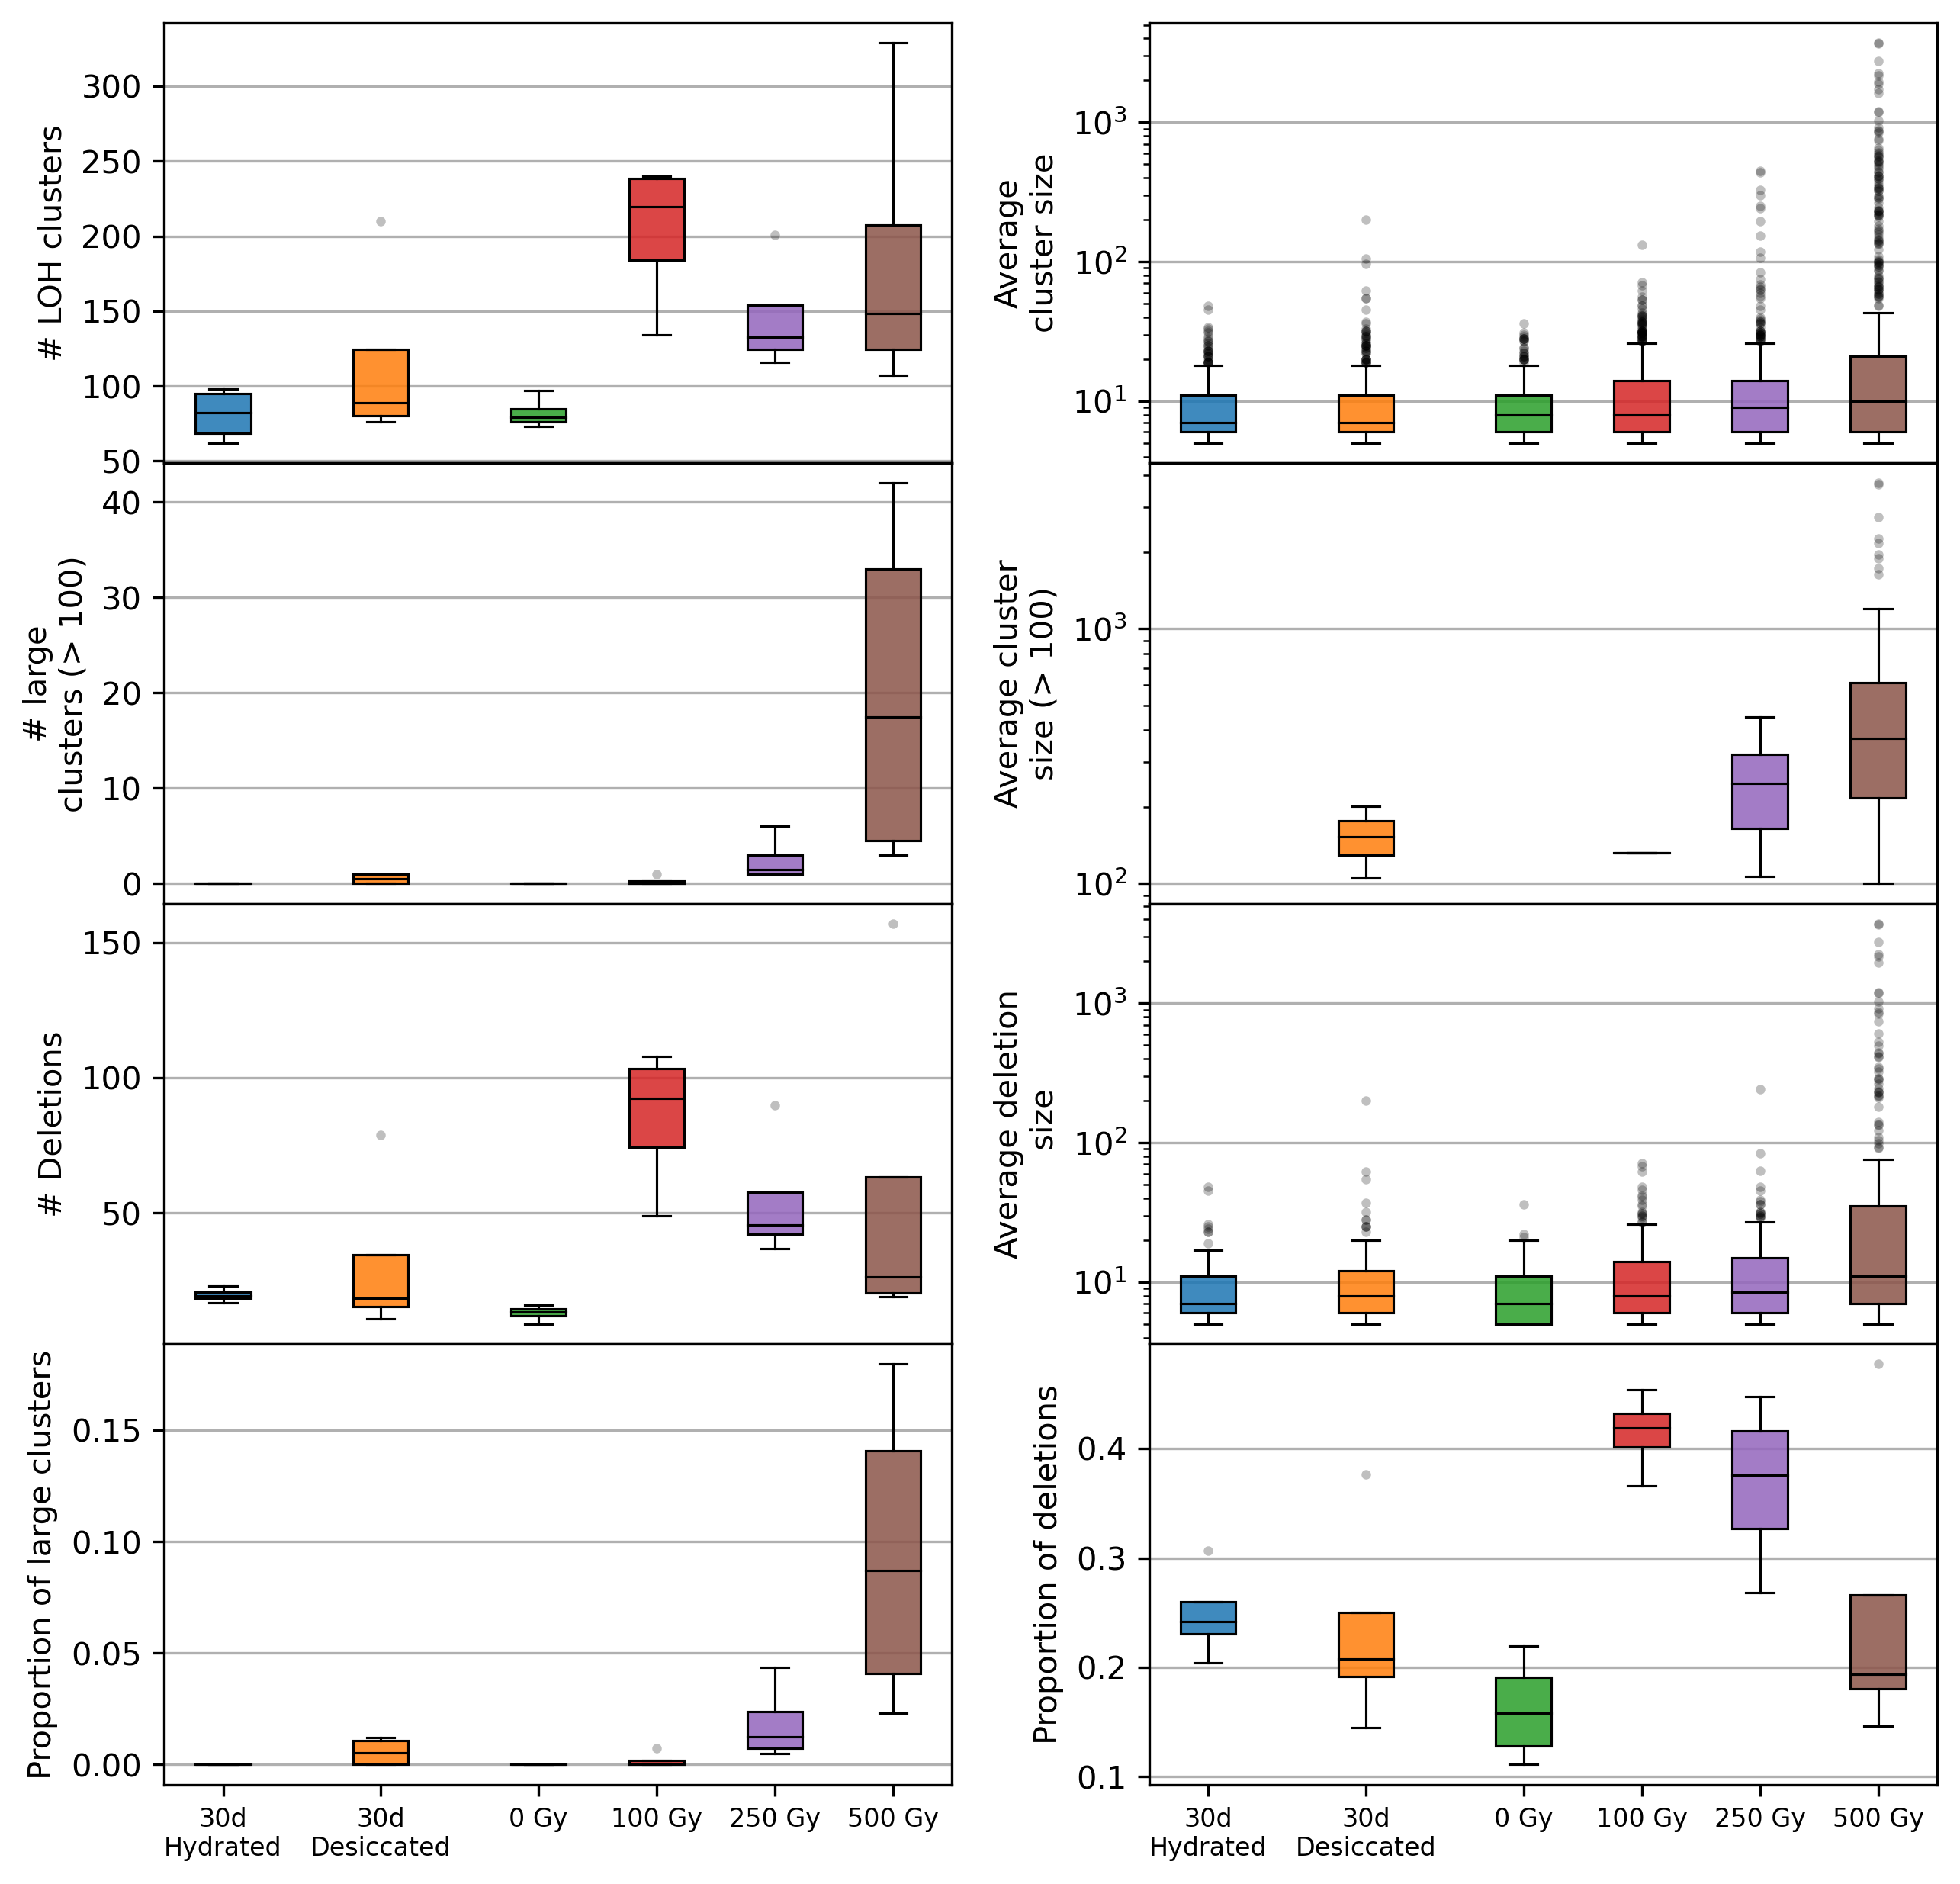

In [118]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas = ["FF", "DB", "B5", "91", "6E", "47", "24", "00"][::-1]

def format_boxplot(bp) :
    [x.set_marker(".") for n, x in enumerate(bp["fliers"])]
    [x.set_markerfacecolor((0,0,0,0.25)) for n, x in enumerate(bp["fliers"])]
    [x.set_markeredgewidth(0) for n, x in enumerate(bp["fliers"])]
    [x.set_facecolor(cycle[n]+alphas[-2]) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["caps"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["whiskers"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["medians"])]
    [x.set_color("k") for n, x in enumerate(bp["medians"])]
    

condition = ["30d\nHydrated", "30d\nDesiccated", "0 Gy", "100 Gy", "250 Gy", "500 Gy"]
positions = [0, 2, 4, 5.5, 7, 8.5]

fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(10,10))

ax = axs[0,0]
bp = ax.boxplot(x=boxplot_data["numC"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# LOH clusters")

ax = axs[0,1]
bp = ax.boxplot(x=boxplot_data["avSz"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average\ncluster size")
ax.set_yscale("log")

ax = axs[1,0]
bp = ax.boxplot(x=boxplot_data["NumLar"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# large\nclusters (> 100)")

ax = axs[1,1]
bp = ax.boxplot(x=boxplot_data["avLarS"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average cluster\nsize (> 100)")
ax.set_yscale("log")

ax = axs[2,0]
bp = ax.boxplot(x=boxplot_data["numDel"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# Deletions")

ax = axs[2,1]
bp = ax.boxplot(x=boxplot_data["avDelS"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average deletion\n size")
ax.set_yscale("log")

ax = axs[3,0]
props = []
for cond, counts_large in boxplot_data["NumLar"].items() :
    counts_normal = boxplot_data["numC"][cond]
    cond_props = [il/jn for il, jn in zip(counts_large, counts_normal)]
    props.append(cond_props)
bp = ax.boxplot(x=props, positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Proportion of large clusters")

ax = axs[3,1]
props = []
for cond, counts_del in boxplot_data["numDel"].items() :
    counts_normal = boxplot_data["numC"][cond]
    cond_props = [il/jn for il, jn in zip(counts_del, counts_normal)]
    props.append(cond_props)
bp = ax.boxplot(x=props, positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Proportion of deletions")

for axi in axs[:-1,:] :
    for ax in axi :
        ax.tick_params(axis="x", length=0)

ax = axs[-1,0]
ax.set_xticks(positions)
ax.set_xticklabels(condition, fontsize=8)
ax = axs[-1,1]
ax.set_xticks(positions)
ax.set_xticklabels(condition, fontsize=8)

for ax in axs.flatten() :
    ax.grid(axis="y", zorder=1)
    ax.set_xlim(-0.75, 9.25)

fig.subplots_adjust(hspace=0.0, wspace=0.25)

plt.show()

# Figure 1cd

In [9]:
mpl.rcParams['figure.dpi'] = 300

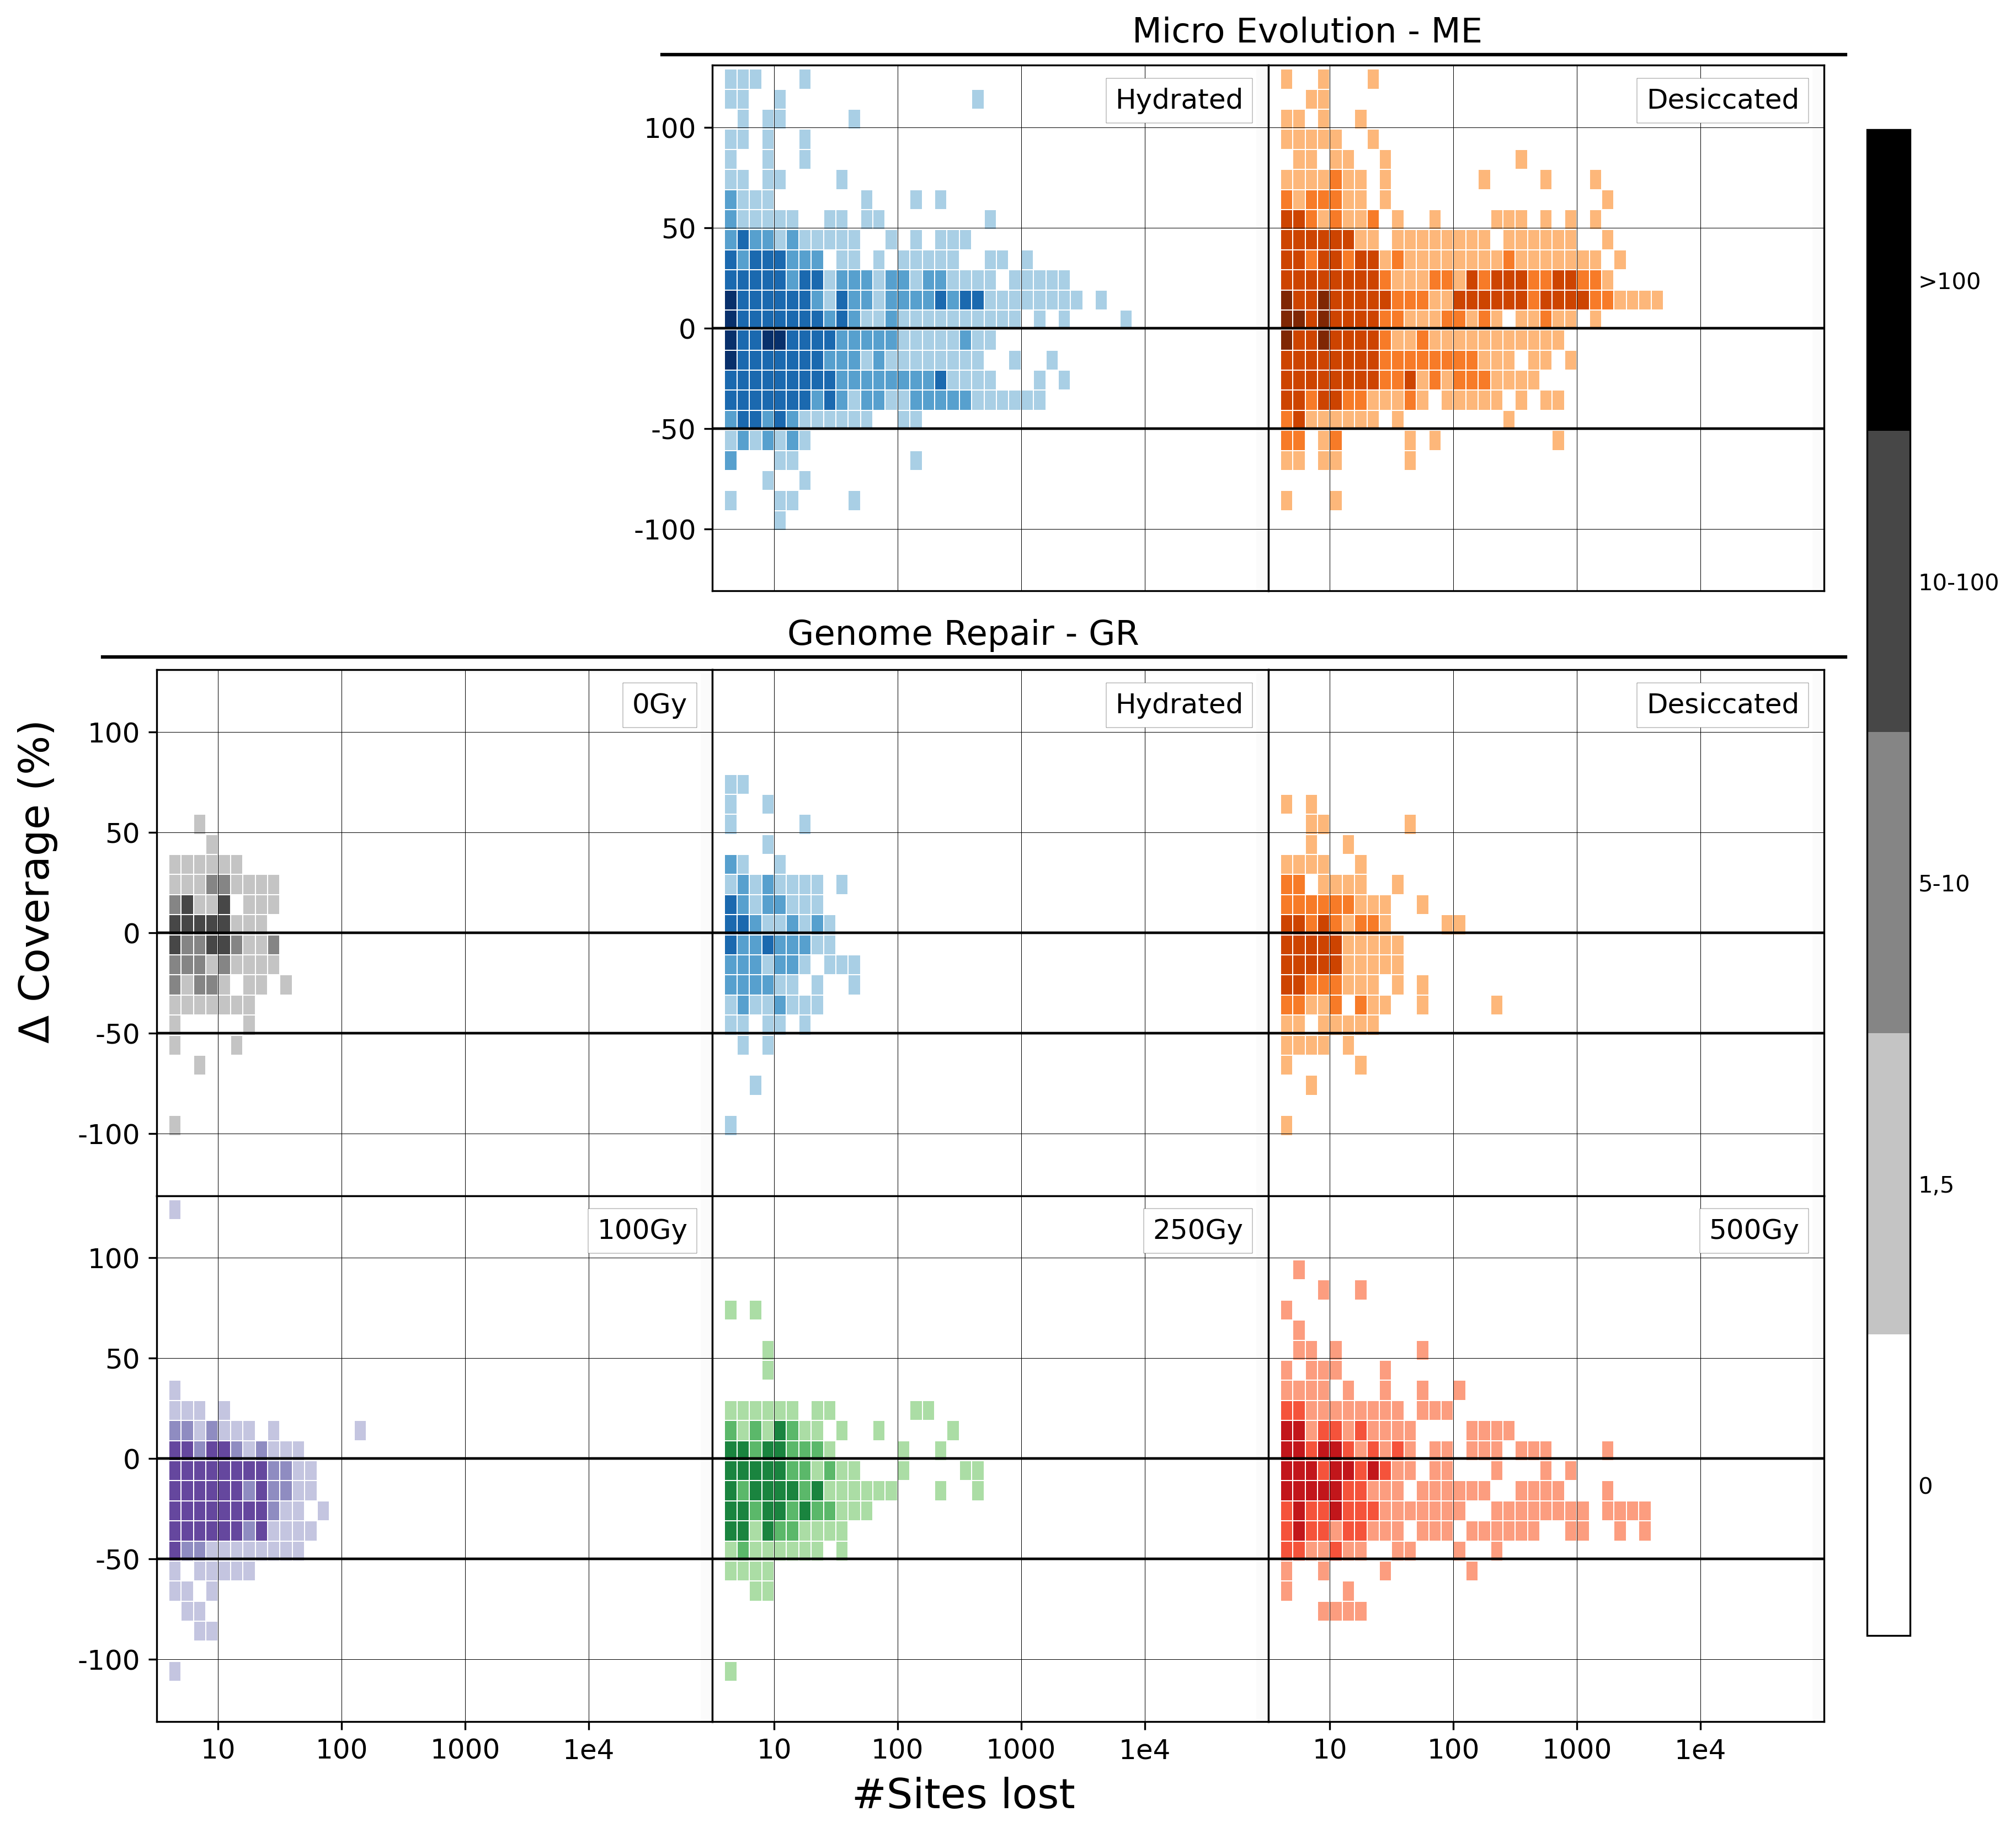

In [16]:
"""Helper dicts"""
condition_grid = {
    "30H":(0,1),
    "30D":(0,2),
    "0Gy":(0,0),
    "100Gy":(1,0),
    "250Gy":(1,1),
    "500Gy":(1,2),
    "H":0,
    "D":1,
}

condition_title_2dhist = {
    "30H":"Hydrated",
    "30D":"Desiccated",
    "0Gy":"0Gy",
    "100Gy":"100Gy",
    "250Gy":"250Gy",
    "500Gy":"500Gy",
    "H":"Hydrated",
    "D":"Desiccated",
}


"""Prepare data"""
data = {}
for sm, df in all_clusters_merged.items() :
    cond = sample_cond[sm]
    cdf = df.query("GET_size >= @min_size")
    if cond not in data.keys() :
        data[cond] = cdf
    else :
        data[cond] = pd.concat([data[cond], cdf])
        data[cond] = data[cond].reset_index(drop=True)

"""Prepare figure"""
fig = plt.figure(figsize=(13,13))#, layout="constrained")

gs0 = fig.add_gridspec(2, 1, height_ratios=(1,2), hspace=0.1)
gs1 = gs0[0].subgridspec(1, 3, hspace=0.0, wspace=0.0)

ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ma_axs = [ax2, ax3]

gs2 = gs0[1].subgridspec(2, 3, hspace=0.0, wspace=0.0)
gr_axs = [[fig.add_subplot(gs2[r,c]) for c in range(3)] for r in range(2)]

"""Titles and labels"""
fig.text(
    s='Micro Evolution - ME',
    ha="center", va="center",
    x=0.66, y=0.895, fontsize=15,
)

fig.text(
    s='Genome Repair - GR',
    ha="center", va="center",
    x=0.5, y=0.615, fontsize=15,
)

fig.text(0.5, 0.07, '#Sites lost', ha='center', fontsize=18)
fig.text(0.06, 0.5, r"$\Delta$ Coverage (%)", va='center', rotation='vertical', fontsize=18)

for condition, cdf in data.items() :
    
    if condition in ["H", "D"] :
        ax = ma_axs[condition_grid[condition]]
    else :
        pp = condition_grid[condition]
        ax = gr_axs[pp[0]][pp[1]]
        
    cmap = conditions_cmap[condition]  # define the colormap
    cmaplist = [cmap(i) for i in range(32, cmap.N)] # extract all colors from the .jet map
    cmaplist[0] = (1.0, 1.0, 1.0, 1.0) # force the first color entry to be white
    mycmap = mpl.colors.LinearSegmentedColormap.from_list('My cmap', cmaplist, cmap.N)
    bounds = [0, 1, 5, 10, 50, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    counts, xedges, yedges, im = ax.hist2d(
        np.log10(cdf["GET_size"]), cdf["DIFF"],
        range=((0.5,5),(-131,131)),
        bins=(np.arange(0.5,5.0,0.1),np.arange(-131,131,10)),
        norm=norm, cmap=mycmap,
        ec="w", lw=0.1,
    )
    
    ax.text(
        x=4.8, y=120, s=condition_title_2dhist[condition], fontsize=12,
        ha="right", va="top",
        bbox={"facecolor":"white", "linewidth":0.1},
    )
    
    if condition in ["H", "0Gy", "100Gy"] :
        ax.set_yticks([-100, -50, 0, 50, 100])
        ax.set_yticklabels([-100, -50, 0, 50, 100], fontsize=12)
    else :
        ax.tick_params(axis="y", length=0)
        ax.set_yticklabels([])
        ax.set_yticks([])
        
    if condition in ["100Gy", "250Gy", "500Gy"] :
        ax.set_xticks([1,2,3,4])
        ax.set_xticklabels(["10","100","1000","1e4"], fontsize=12)
    else :
        ax.tick_params(axis="x", length=0)
        ax.set_xticklabels([])
        ax.set_xticks([])
    
    for xpos in [1,2,3,4,5] :
        for val in [-100,50,100] :
            ax.plot([0,5],[val,val], color="k", lw=0.2, zorder=1)
        for val in [-50,0] :
            ax.plot([0,5],[val,val], color="k", lw=1.0, zorder=1)

        ax.vlines([1,2,3,4], ymin=-160, ymax=160, color="k", lw=0.2, zorder=1)
    
    if condition == "0Gy" :
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        cbar = fig.colorbar(im, cax=cbar_ax, spacing='uniform', ticks=[0.5,3,7.5,30,75], boundaries=bounds, format='%1i')
        cbar_ax.set_yticklabels(['0', '1,5', '5-10', '10-100', '>100'])
        cbar.ax.tick_params(length=0, which="both")
        
    ax.set_ylim(-131,131)
    ax.set_xlim(0.5,5)
    ax.set_facecolor((0.985,0.985,0.985))


ln = Line2D([0.36,0.91], [0.885,0.885], color="k")
ln2 = Line2D([0.1,0.91], [0.605,0.605], color="k")

fig.add_artist(ln)
fig.add_artist(ln2)

plt.show()

# <--- UNUSED FIGURES --->

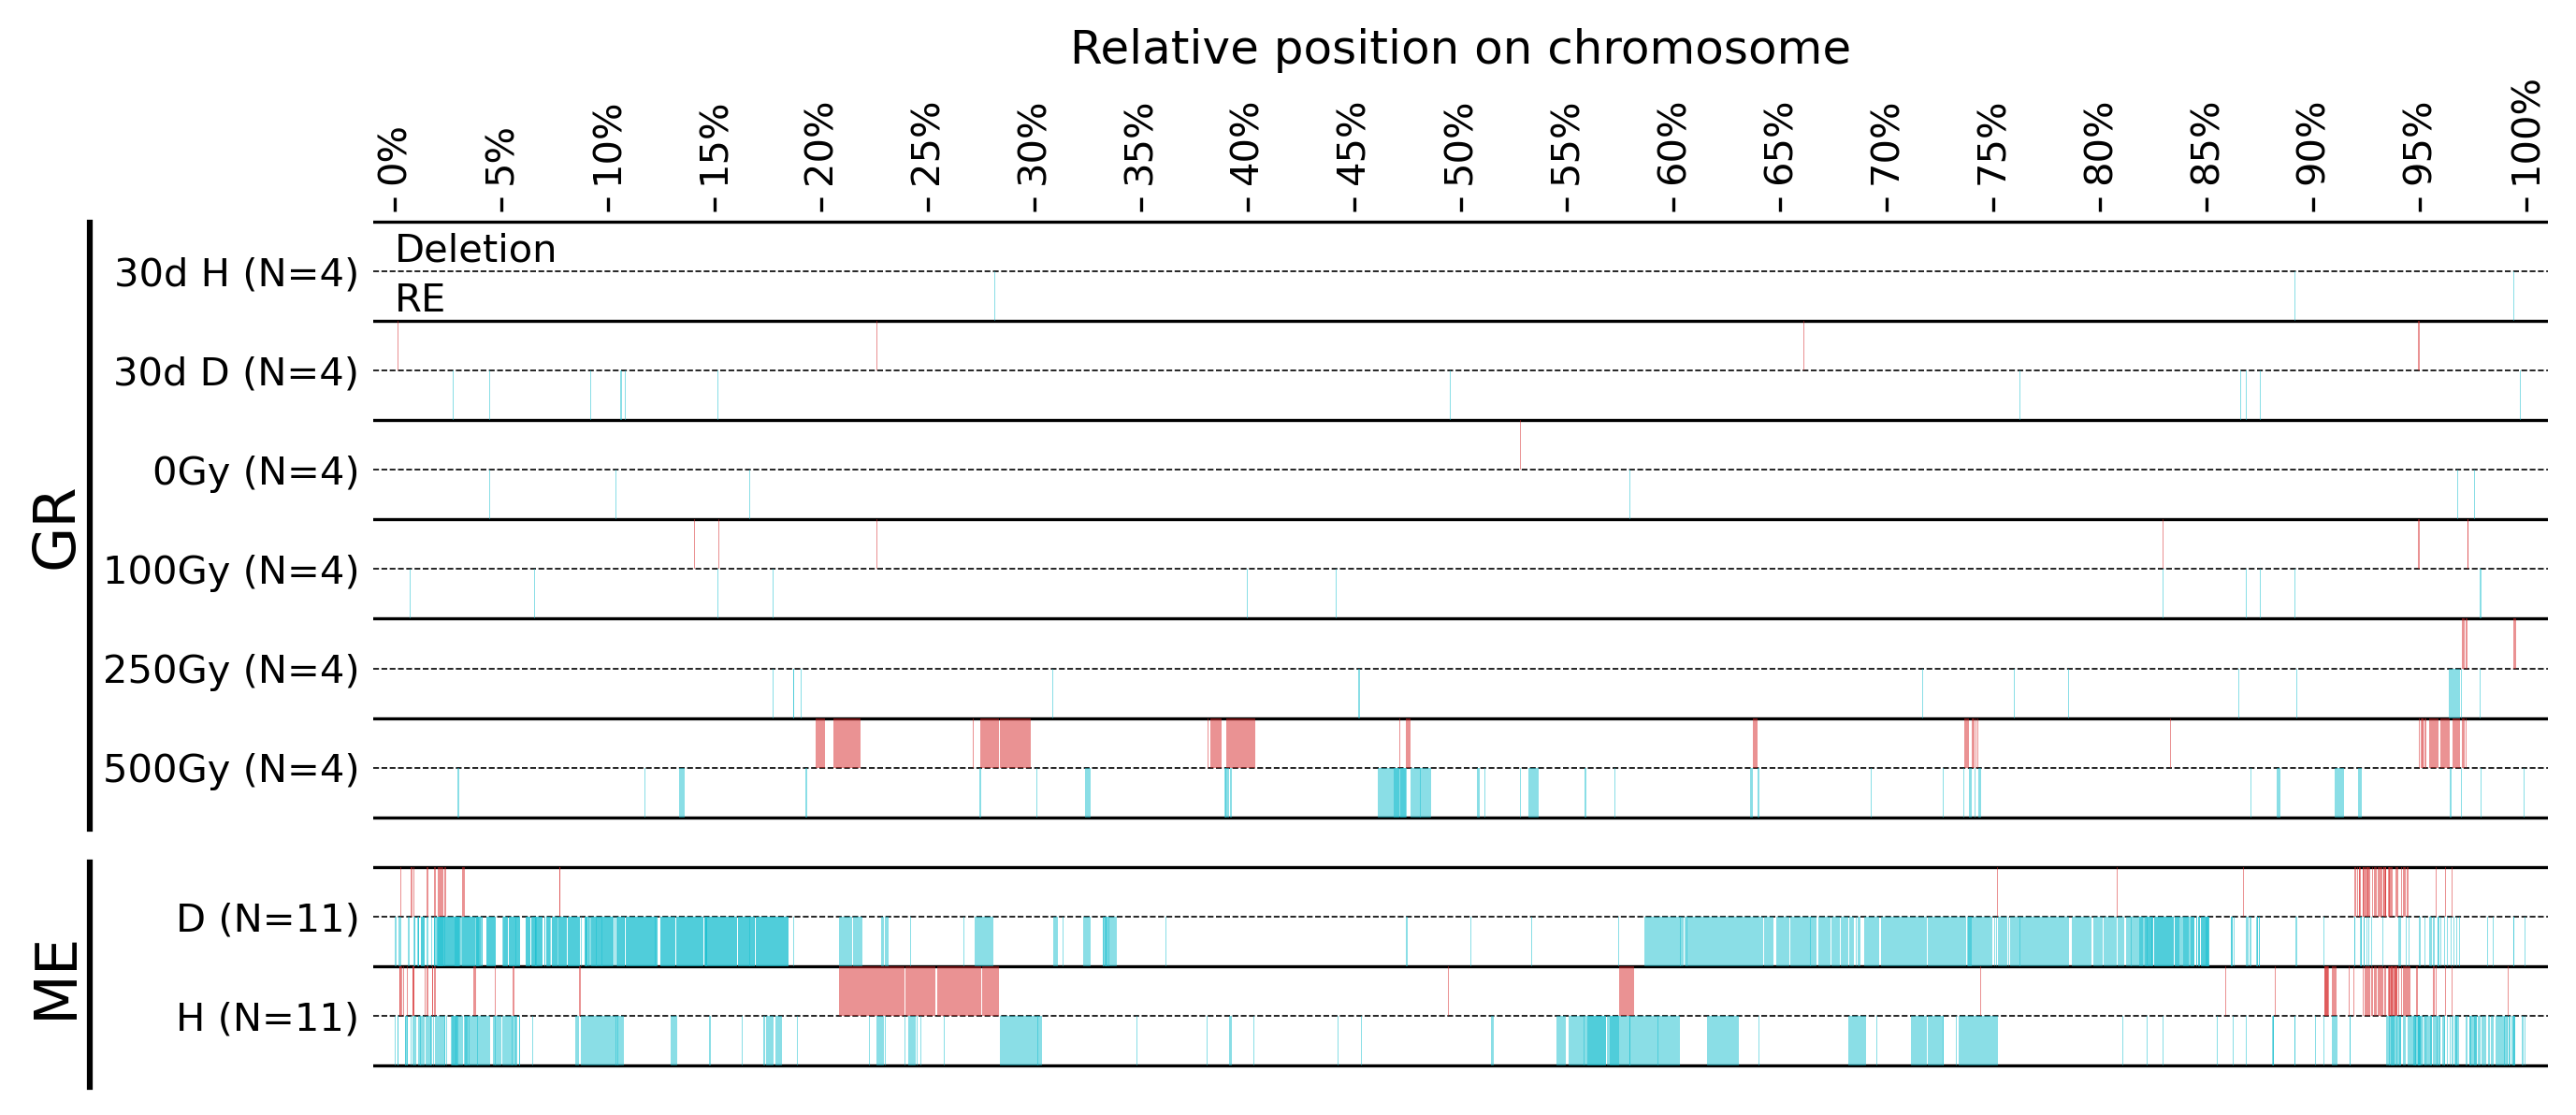

In [17]:
cond_y0 = {
    "H":-4.5,
    "D":-3.5,
    "500Gy":-2,
    "250Gy":-1,
    "100Gy":0,
    "0Gy":1,
    "30D":2,
    "30H":3,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "500Gy": (1.0,0.0,0.0,0.6), # red
    "H": (0.0,0.0,1.0,0.6),
    "D": (1.0,0.25,0.0,0.6),
}

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
event_colors = {
    "DEL":ccycle[3]+"80", # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9]+"80", # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}


fig, ax = plt.subplots(sharex=False, figsize=(10,4))

patches = []

ax.set_ylim(-4.6,4.1)
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Relative position on chromosome", fontsize=12, pad=-5.0)
ax.xaxis.tick_top()

ax.set_xlim(-0.01, 1.01)
xticksval = [i for i in np.arange(0.0, 1.01, 0.05)]
ax.set_xticks(xticksval)
ax.set_xticklabels([str(int(i*100))+"%" for i in xticksval], rotation="vertical")

#for i in [-4.5,-3.5,-2.5,-2,-1,0,1,2,3,4,5] :
#    ax.plot([-0.01, 1.01], [i,i], lw=0.4, color="k")

ax.set_yticks([-4.0,-3.0,-1.5,-0.5,0.5,1.5,2.5,3.5], minor=False)
ax.set_yticks([-4.5,-3.5,-2.5,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0], minor=True)
ax.set_yticklabels(["H (N=11)","D (N=11)","500Gy (N=4)","250Gy (N=4)","100Gy (N=4)","0Gy (N=4)","30d D (N=4)","30d H (N=4)"])
ax.tick_params(axis="y", length=0, which="both")

ax.grid(axis="y", which="major", lw=0.4, linestyle="dashed", color="k", zorder=15)
ax.grid(axis="y", which="minor", lw=0.8, color="k", zorder=15)

for sample, cdf in all_dfs.items() :
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))
    
    y0 = cond_y0[sample_cond[sample]]
    width = 0.5
    
    HR = acdf.query("DIFF >= -25")
    dele = acdf.query("DIFF < -25")
    
    # HR
    patches = []
    for n, row in HR.iterrows() :
        rect = Rectangle((row["RELSTART"], y0), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["LOH"], zorder=10)
    ax.add_collection(collection)

    # Deletions
    patches = []
    for n, row in dele.iterrows() :
        #print(row["RELEND"])
        rect = Rectangle((row["RELSTART"], y0+width), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["DEL"], zorder=10)
    ax.add_collection(collection)
    
    #ax.plot([0.0,1.0], [y0+width, y0+width], lw=1.0, linestyle="dashed", color="k")

ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)

fig.text(0.002, 0.6, 'GR', va='center', rotation='vertical', fontsize=15)
fig.text(0.002, 0.2, 'ME', va='center', rotation='vertical', fontsize=15)

ln1 = Line2D([0.024,0.024], [0.33,0.87], color="k")
ln2 = Line2D([0.024,0.024], [0.1,0.3], color="k")
fig.add_artist(ln1)
fig.add_artist(ln2)

ax.set_xlim(-0.01, 1.01)

ax.text(s="Deletion", x=0, y=3.51, ha="left", va="bottom")
ax.text(s="RE", x=0, y=3.01, ha="left", va="bottom")

plt.show()

# With gene density

In [18]:
rel_gene_df = gene_df.assign(RELSTART=gene_df.apply(lambda x: x["START"]/lengths[x["CHR"]], axis="columns"))
rel_gene_df.sample(2)

,CHR,START,END,INFO,RELSTART
10269,Chrom_2,14500345,14503846,gene,0.890967
6617,Chrom_2,2715165,2715986,gene,0.166832


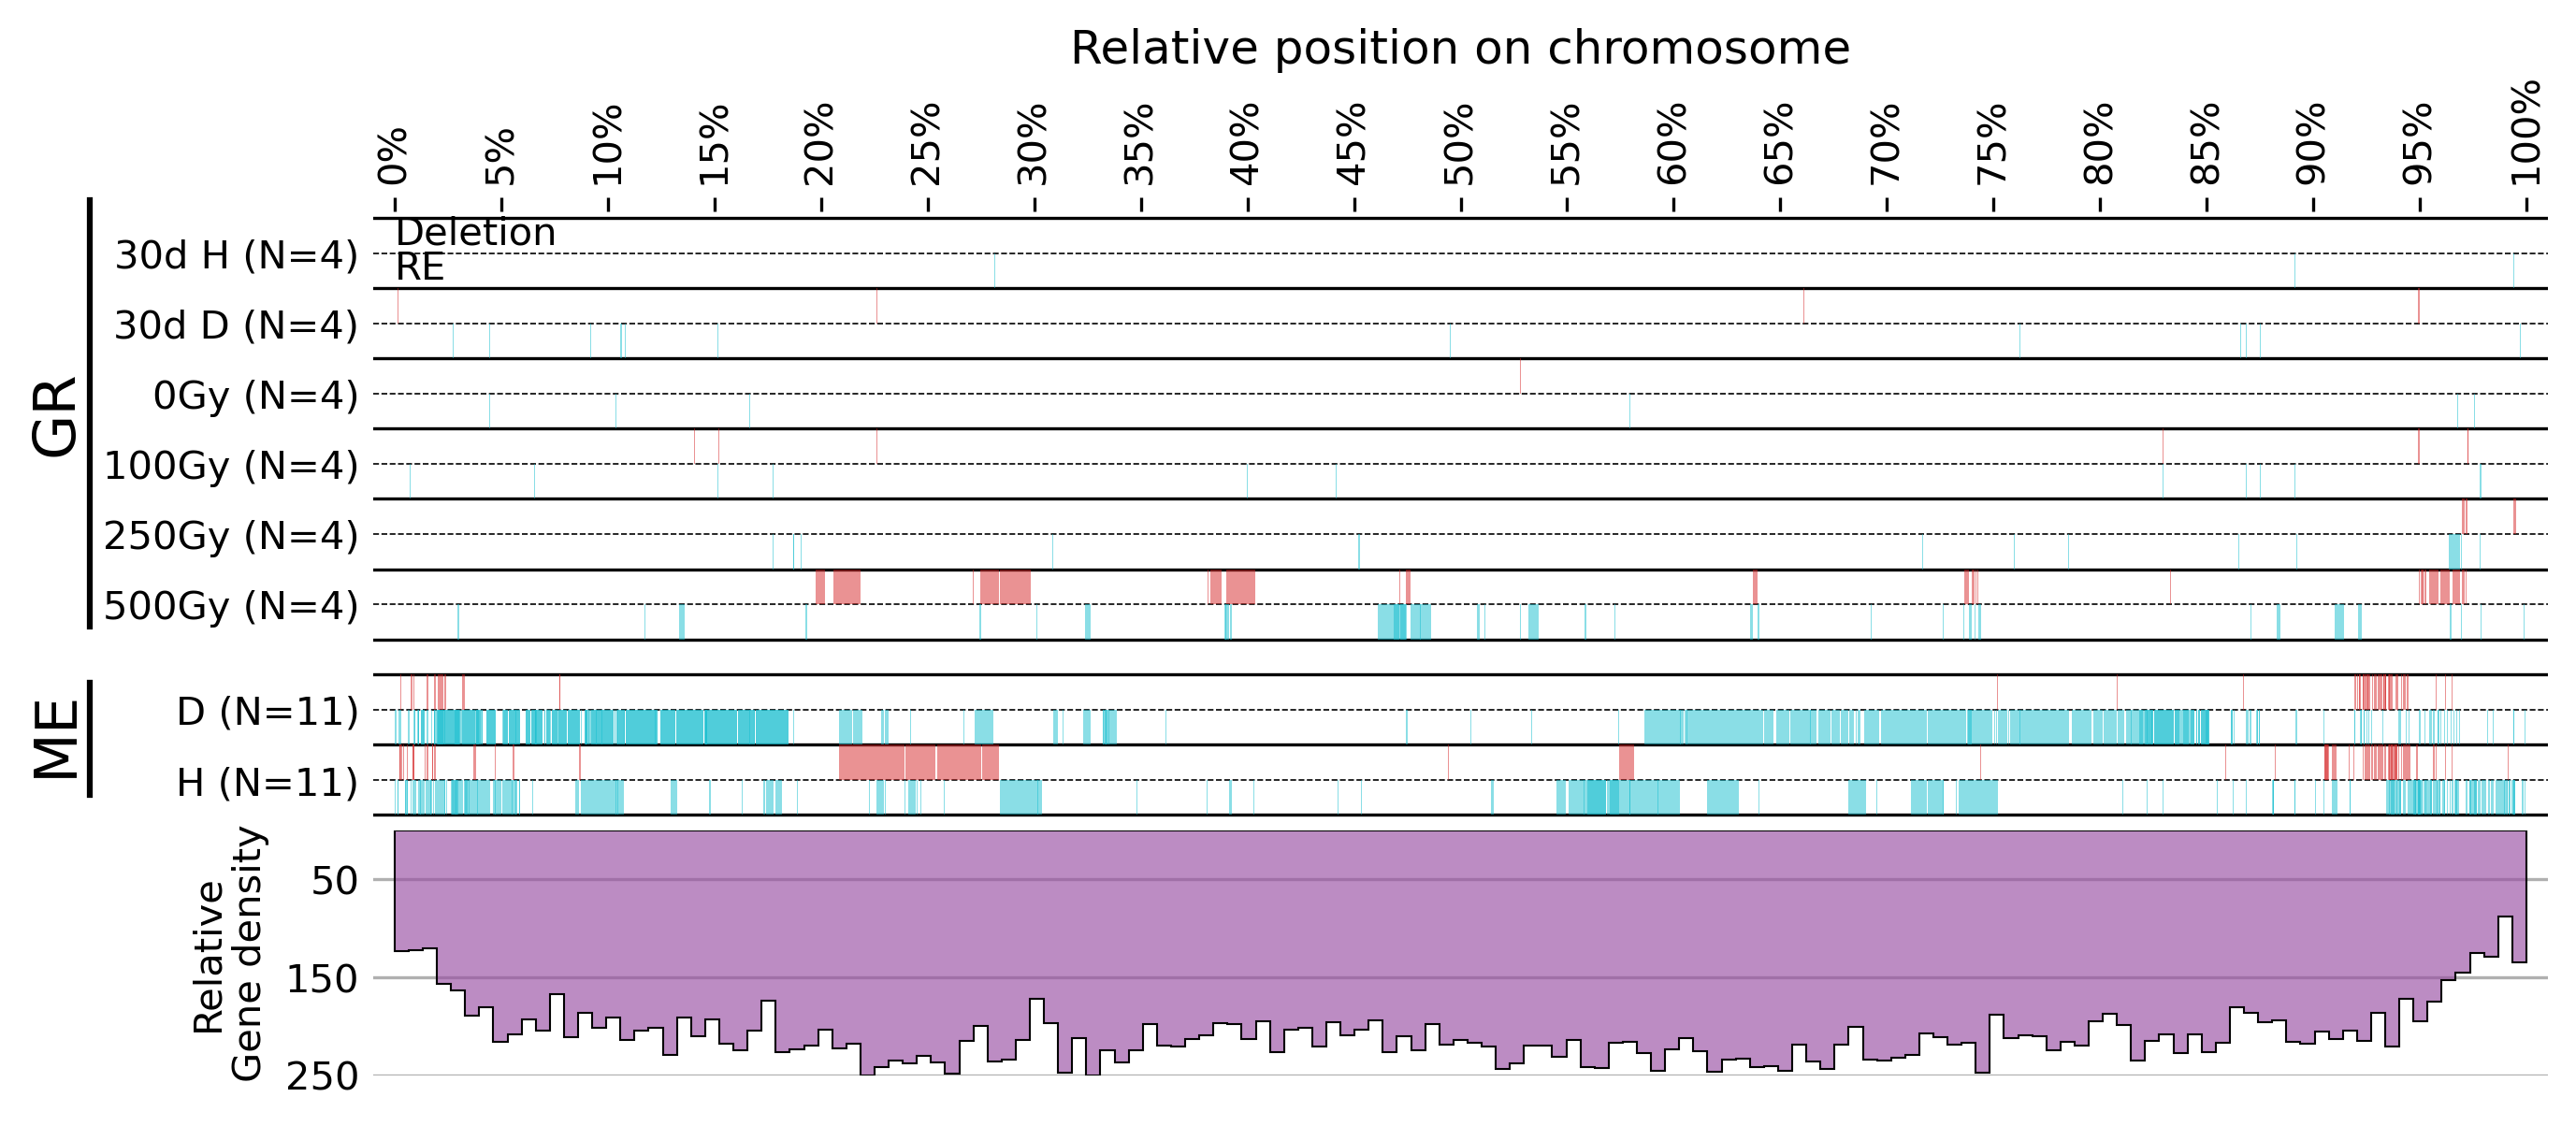

In [19]:
cond_y0 = {
    "H":-4.5,
    "D":-3.5,
    "500Gy":-2,
    "250Gy":-1,
    "100Gy":0,
    "0Gy":1,
    "30D":2,
    "30H":3,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "500Gy": (1.0,0.0,0.0,0.6), # red
    "H": (0.0,0.0,1.0,0.6),
    "D": (1.0,0.25,0.0,0.6),
}

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
event_colors = {
    "DEL":ccycle[3]+"80", # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9]+"80", # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}


fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(10,4), gridspec_kw={"height_ratios":[5,2]})


ax = axs[0]
patches = []

ax.set_ylim(-4.6,4.1)
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Relative position on chromosome", fontsize=12, pad=-5.0)
ax.xaxis.tick_top()

ax.set_xlim(-0.01, 1.01)
xticksval = [i for i in np.arange(0.0, 1.01, 0.05)]
ax.set_xticks(xticksval)
ax.set_xticklabels([str(int(i*100))+"%" for i in xticksval], rotation="vertical")

#for i in [-4.5,-3.5,-2.5,-2,-1,0,1,2,3,4,5] :
#    ax.plot([-0.01, 1.01], [i,i], lw=0.4, color="k")

ax.set_yticks([-4.0,-3.0,-1.5,-0.5,0.5,1.5,2.5,3.5], minor=False)
ax.set_yticks([-4.5,-3.5,-2.5,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0], minor=True)
ax.set_yticklabels(["H (N=11)","D (N=11)","500Gy (N=4)","250Gy (N=4)","100Gy (N=4)","0Gy (N=4)","30d D (N=4)","30d H (N=4)"])
ax.tick_params(axis="y", length=0, which="both")

ax.grid(axis="y", which="major", lw=0.4, linestyle="dashed", color="k", zorder=15)
ax.grid(axis="y", which="minor", lw=0.8, color="k", zorder=15)

for sample, cdf in all_dfs.items() :
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))
    
    y0 = cond_y0[sample_cond[sample]]
    width = 0.5
    
    HR = acdf.query("DIFF >= -25")
    dele = acdf.query("DIFF < -25")
    
    # HR
    patches = []
    for n, row in HR.iterrows() :
        rect = Rectangle((row["RELSTART"], y0), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["LOH"], zorder=10)
    ax.add_collection(collection)

    # Deletions
    patches = []
    for n, row in dele.iterrows() :
        #print(row["RELEND"])
        rect = Rectangle((row["RELSTART"], y0+width), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["DEL"], zorder=10)
    ax.add_collection(collection)
    
    #ax.plot([0.0,1.0], [y0+width, y0+width], lw=1.0, linestyle="dashed", color="k")

ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)

fig.text(0.002, 0.7, 'GR', va='center', rotation='vertical', fontsize=15)
fig.text(0.002, 0.415, 'ME', va='center', rotation='vertical', fontsize=15)

ln1 = Line2D([0.024,0.024], [0.51,0.89], color="k")
ln2 = Line2D([0.024,0.024], [0.36,0.46], color="k")
fig.add_artist(ln1)
fig.add_artist(ln2)

ax.set_xlim(-0.01, 1.01)

ax.text(s="Deletion", x=0, y=3.51, ha="left", va="bottom")
ax.text(s="RE", x=0, y=3.01, ha="left", va="bottom")

ax = axs[1]

ax.hist(rel_gene_df["RELSTART"], bins=151, ec="k", histtype="stepfilled", color=col_TE, lw=0.5, zorder=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlim(-0.01, 1.01)
ax.set_xticks([])
ax.set_ylim(0,250)
ax.set_yticks([50,150,250])
ax.set_ylabel("Relative\nGene density", fontsize=10)

ax.tick_params(axis='y', which='major', length=0)

ax.yaxis.grid(True, zorder=1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(), visible=False)

plt.gca().invert_yaxis()

ax.spines["left"].set_linewidth(0)

fig.subplots_adjust(hspace=0.02)


plt.show()

# With TE density

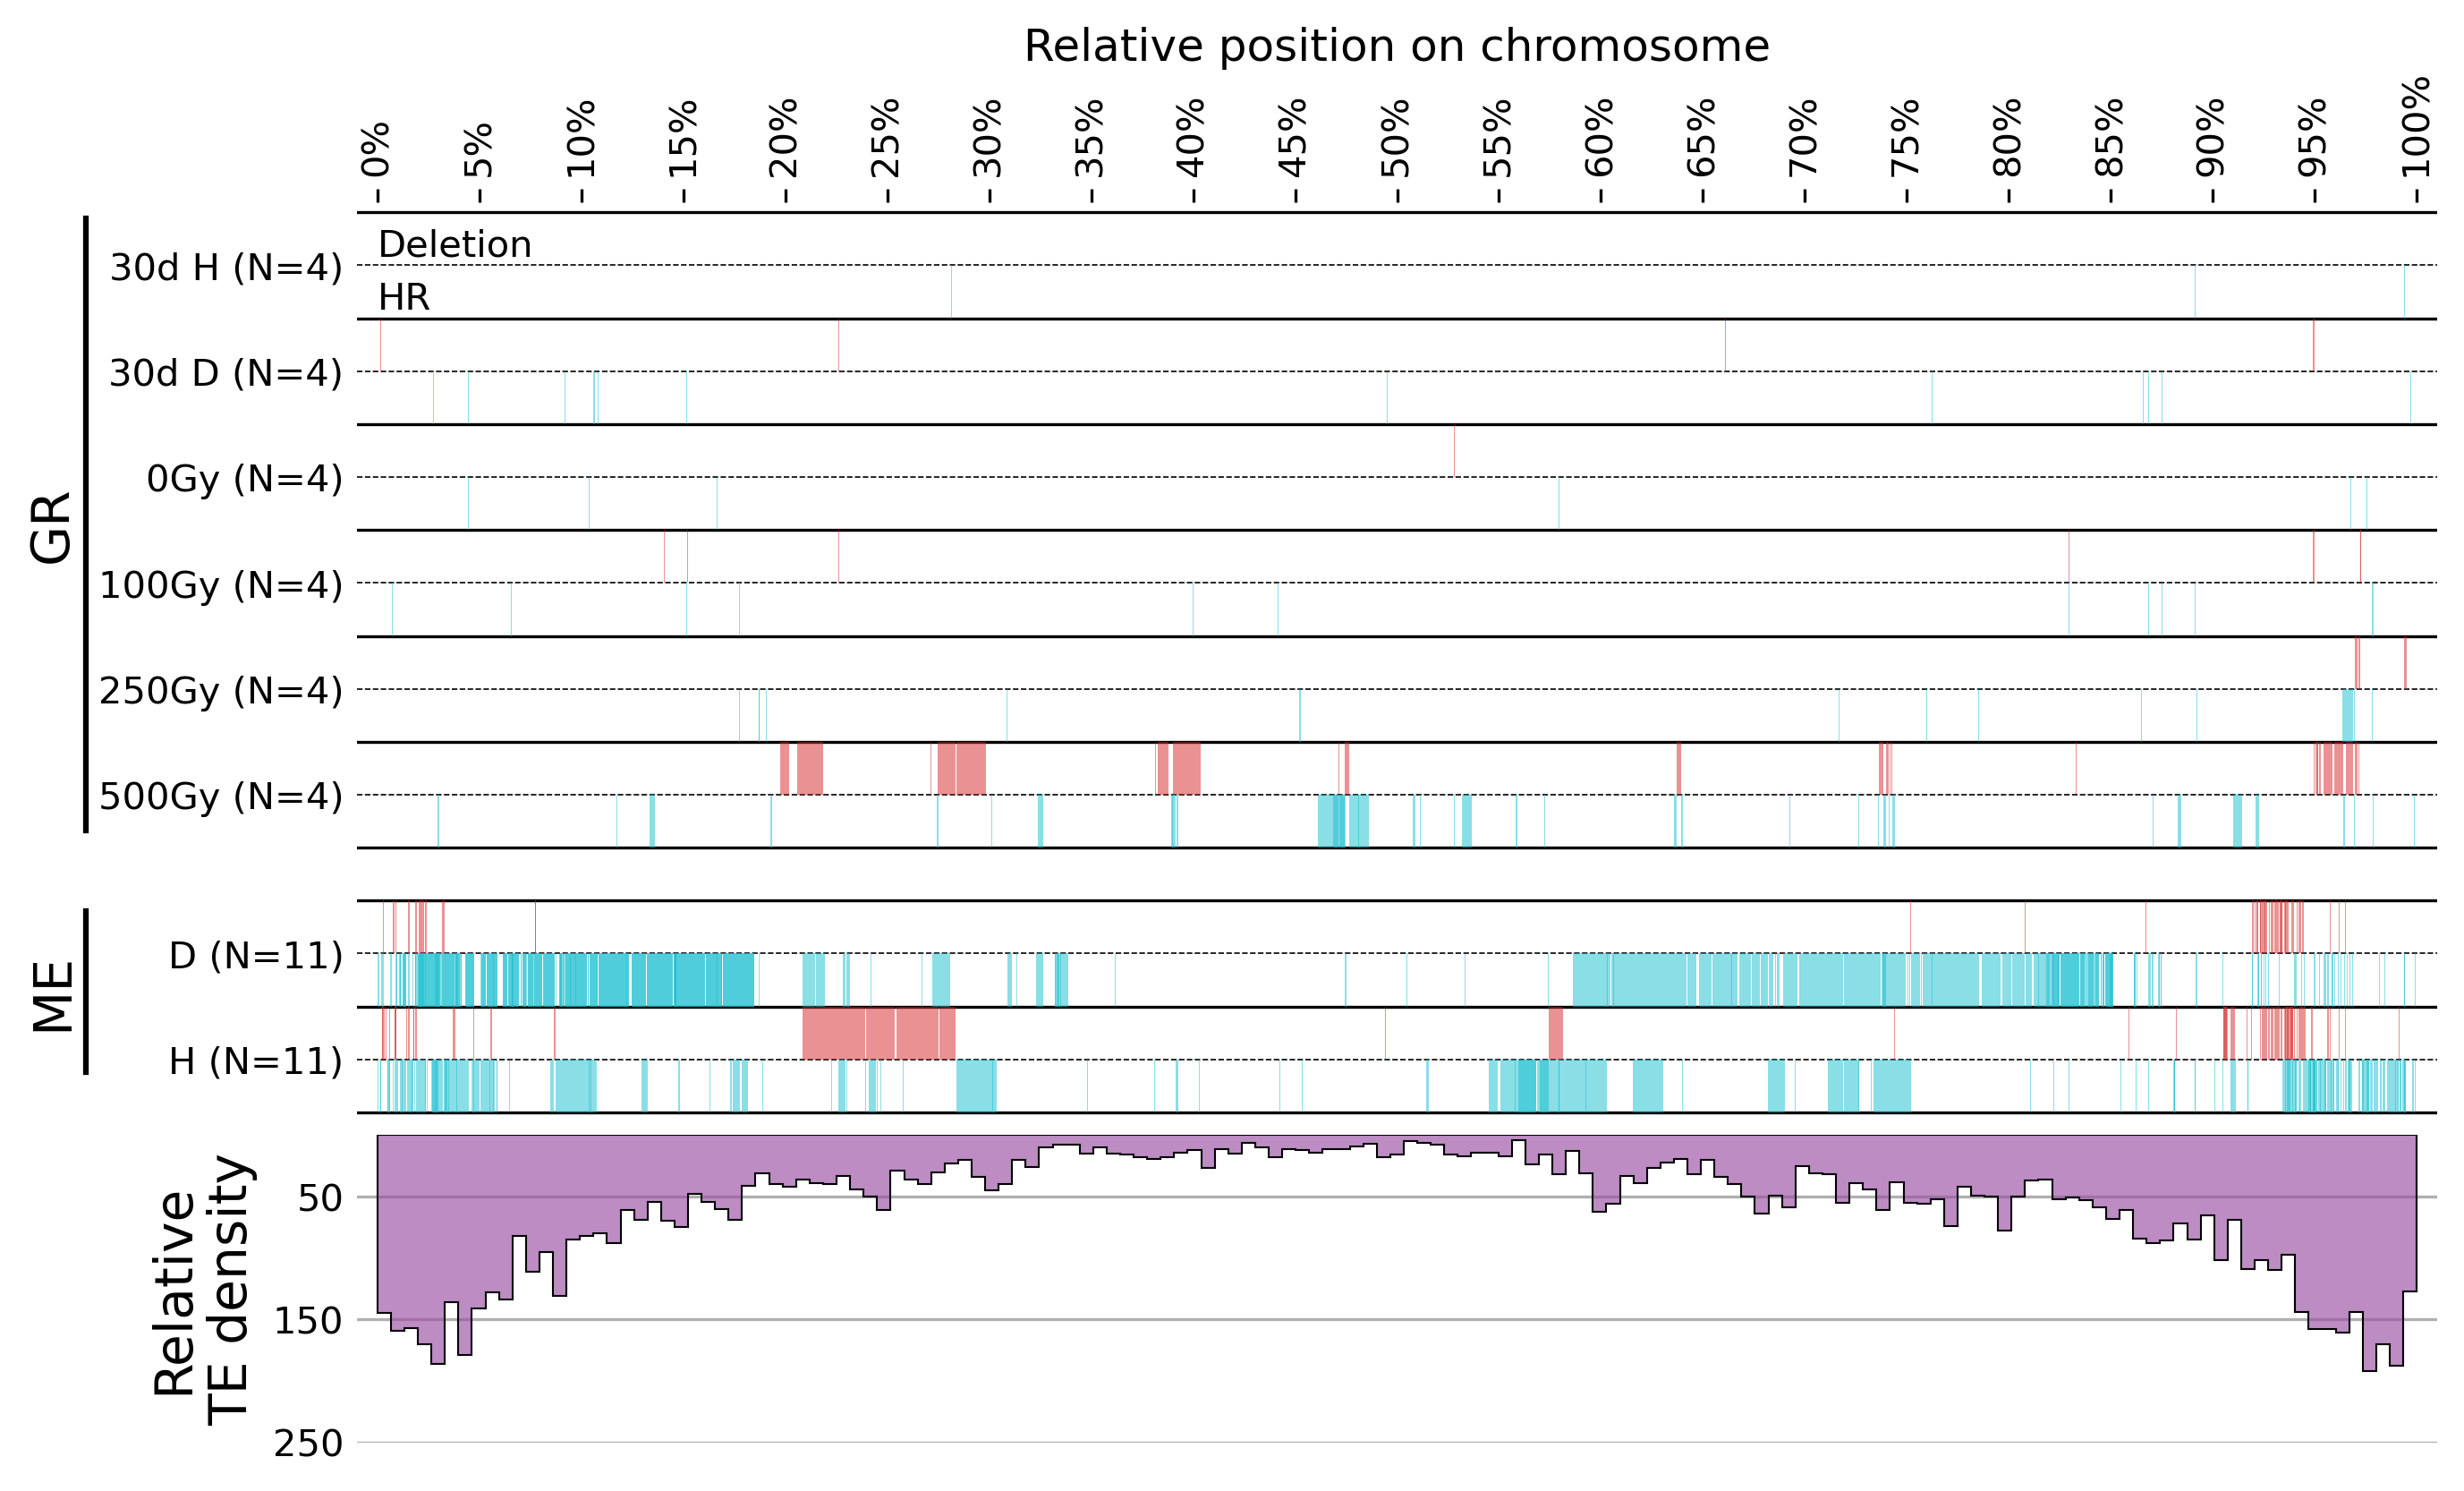

In [20]:
cond_y0 = {
    "H":-4.5,
    "D":-3.5,
    "500Gy":-2,
    "250Gy":-1,
    "100Gy":0,
    "0Gy":1,
    "30D":2,
    "30H":3,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "500Gy": (1.0,0.0,0.0,0.6), # red
    "H": (0.0,0.0,1.0,0.6),
    "D": (1.0,0.25,0.0,0.6),
}

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
event_colors = {
    "DEL":ccycle[3]+"80", # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9]+"80", # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}


fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(10,6), gridspec_kw={"height_ratios":[6,2]})


ax = axs[0]
patches = []

ax.set_ylim(-4.6,4.1)
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Relative position on chromosome", fontsize=12, pad=-5.0)
ax.xaxis.tick_top()

ax.set_xlim(-0.01, 1.01)
xticksval = [i for i in np.arange(0.0, 1.01, 0.05)]
ax.set_xticks(xticksval)
ax.set_xticklabels([str(int(i*100))+"%" for i in xticksval], rotation="vertical")

#for i in [-4.5,-3.5,-2.5,-2,-1,0,1,2,3,4,5] :
#    ax.plot([-0.01, 1.01], [i,i], lw=0.4, color="k")

ax.set_yticks([-4.0,-3.0,-1.5,-0.5,0.5,1.5,2.5,3.5], minor=False)
ax.set_yticks([-4.5,-3.5,-2.5,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0], minor=True)
ax.set_yticklabels(["H (N=11)","D (N=11)","500Gy (N=4)","250Gy (N=4)","100Gy (N=4)","0Gy (N=4)","30d D (N=4)","30d H (N=4)"])
ax.tick_params(axis="y", length=0, which="both")

ax.grid(axis="y", which="major", lw=0.4, linestyle="dashed", color="k", zorder=15)
ax.grid(axis="y", which="minor", lw=0.8, color="k", zorder=15)

for sample, cdf in all_dfs.items() :
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))
    
    y0 = cond_y0[sample_cond[sample]]
    width = 0.5
    
    HR = acdf.query("DIFF >= -25")
    dele = acdf.query("DIFF < -25")
    
    # HR
    patches = []
    for n, row in HR.iterrows() :
        rect = Rectangle((row["RELSTART"], y0), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["LOH"], zorder=10)
    ax.add_collection(collection)

    # Deletions
    patches = []
    for n, row in dele.iterrows() :
        #print(row["RELEND"])
        rect = Rectangle((row["RELSTART"], y0+width), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["DEL"], zorder=10)
    ax.add_collection(collection)
    
    #ax.plot([0.0,1.0], [y0+width, y0+width], lw=1.0, linestyle="dashed", color="k")

ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)

fig.text(0.002, 0.68, 'GR', va='center', rotation='vertical', fontsize=14)
fig.text(0.002, 0.39, 'ME', va='center', rotation='vertical', fontsize=14)

ln1 = Line2D([0.024,0.024], [0.49,0.87], color="k")
ln2 = Line2D([0.024,0.024], [0.34,0.44], color="k")
fig.add_artist(ln1)
fig.add_artist(ln2)

ax.set_xlim(-0.01, 1.01)

ax.text(s="Deletion", x=0, y=3.515, ha="left", va="bottom", fontsize=10)
ax.text(s="HR", x=0, y=3.015, ha="left", va="bottom", fontsize=10)



ax = axs[1]
TEreps = repdf.assign(RELSTART=repdf.apply(lambda x: x["START"]/lengths[x["CHR"]], axis="columns"))

ax.hist(TEreps["RELSTART"], bins=151, ec="k", histtype="stepfilled", color=col_TE, lw=0.5, zorder=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlim(-0.01, 1.01)
ax.set_xticks([])
ax.set_ylim(0,250)
ax.set_yticks([50,150,250])
ax.set_ylabel("Relative\nTE density", fontsize=14)

ax.tick_params(axis='y', which='major', length=0)

ax.yaxis.grid(True, zorder=1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(), visible=False)

plt.gca().invert_yaxis()

ax.spines["left"].set_linewidth(0)

fig.subplots_adjust(hspace=0.02)


plt.show()

## Separated by chromosome

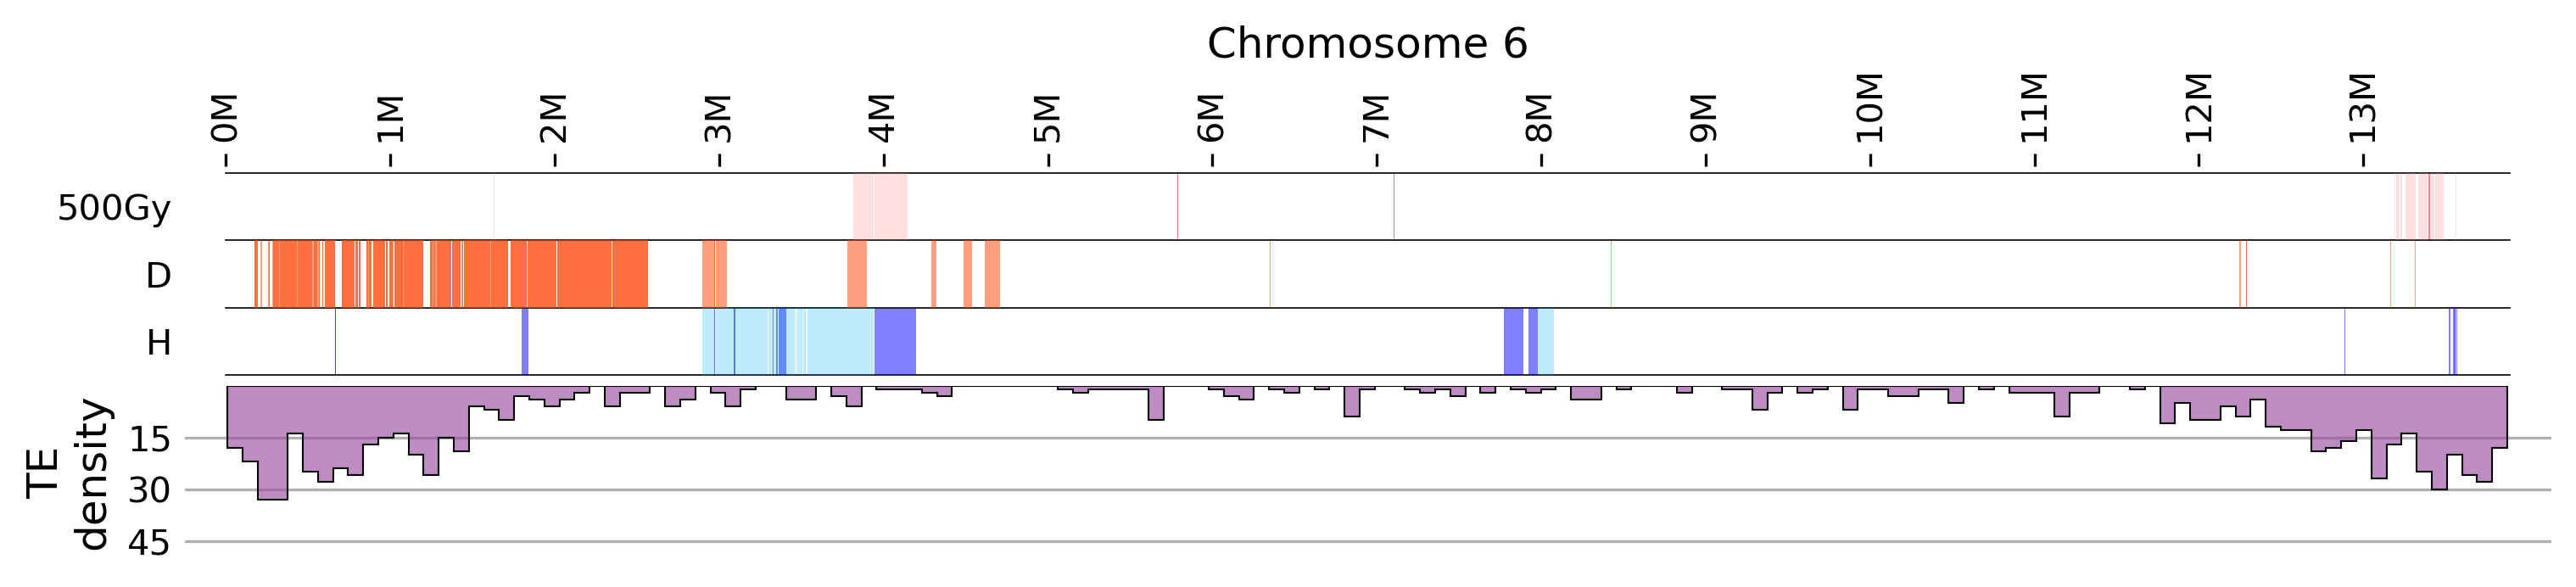

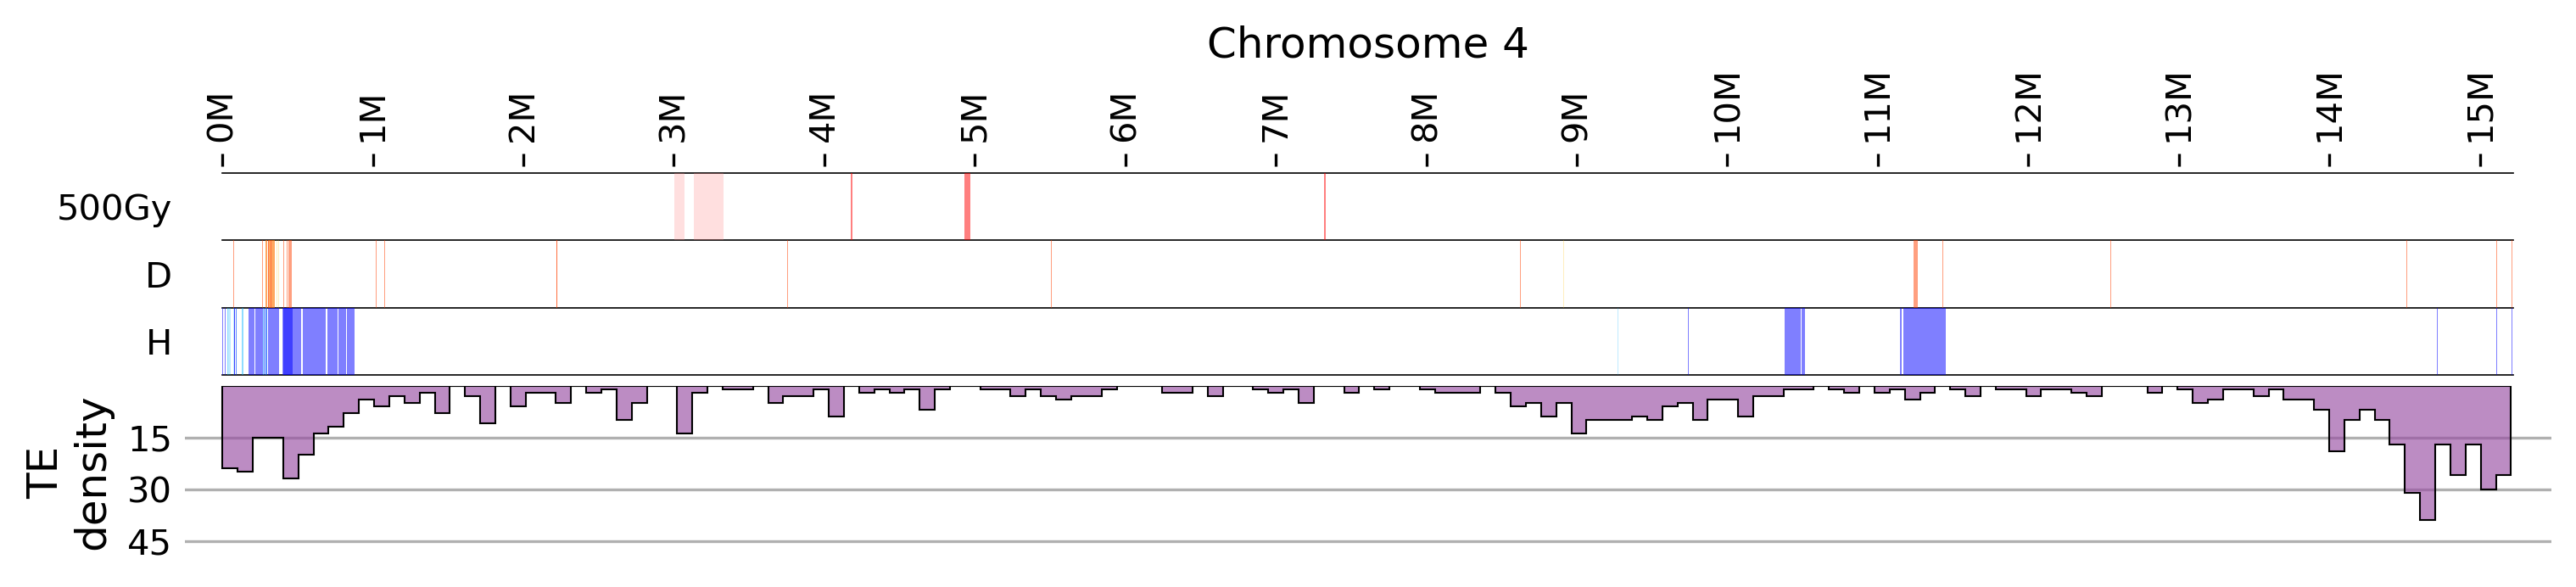

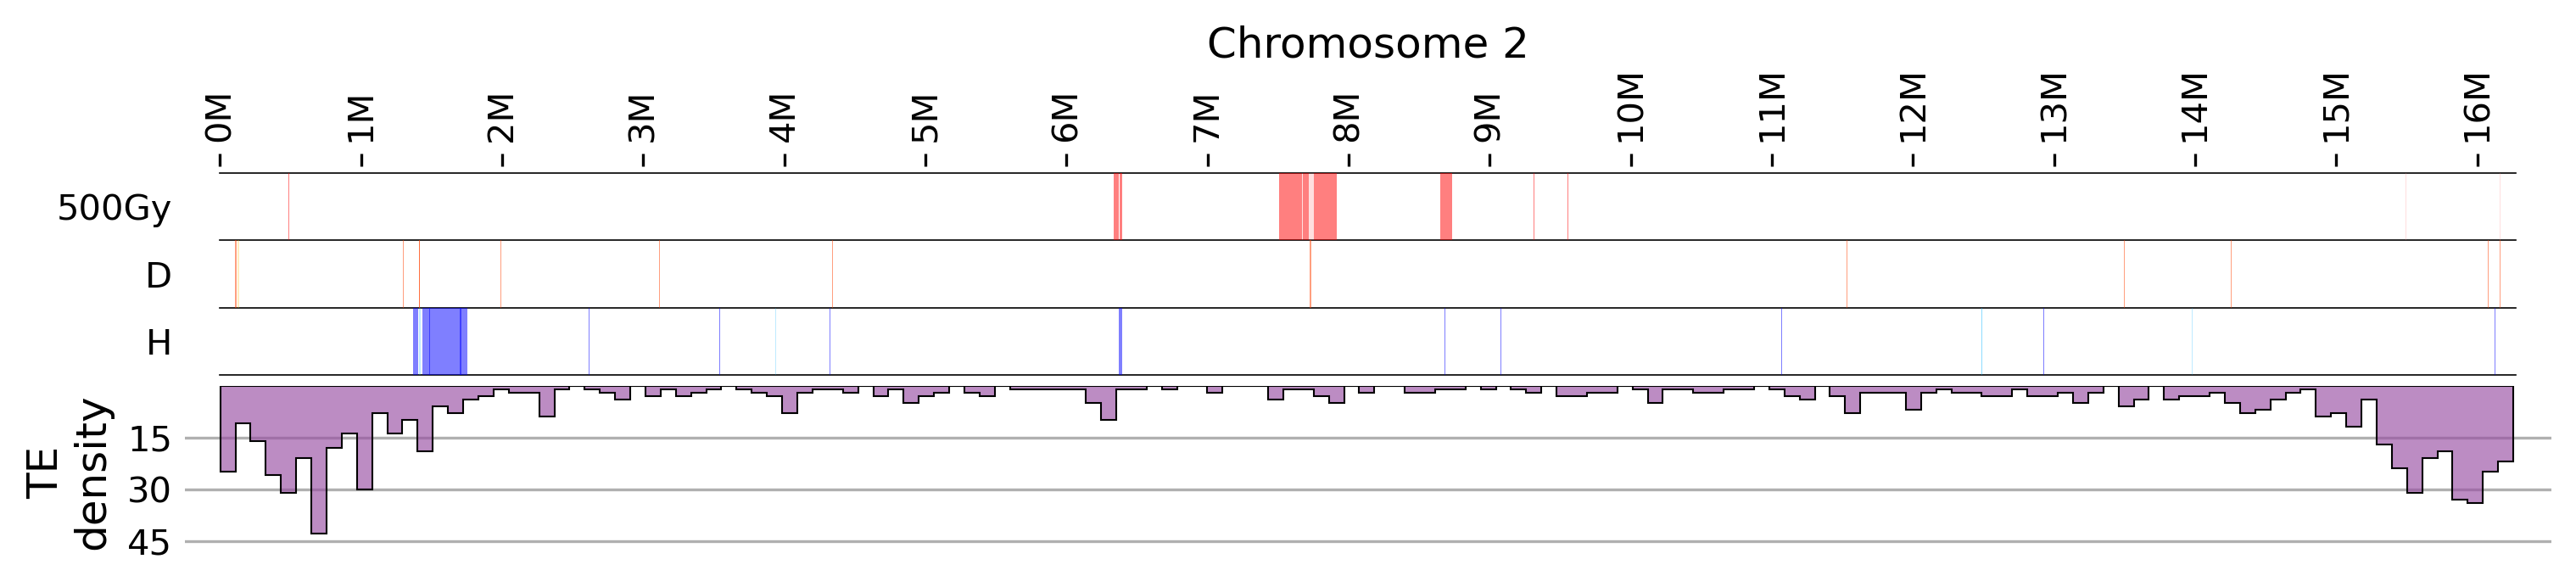

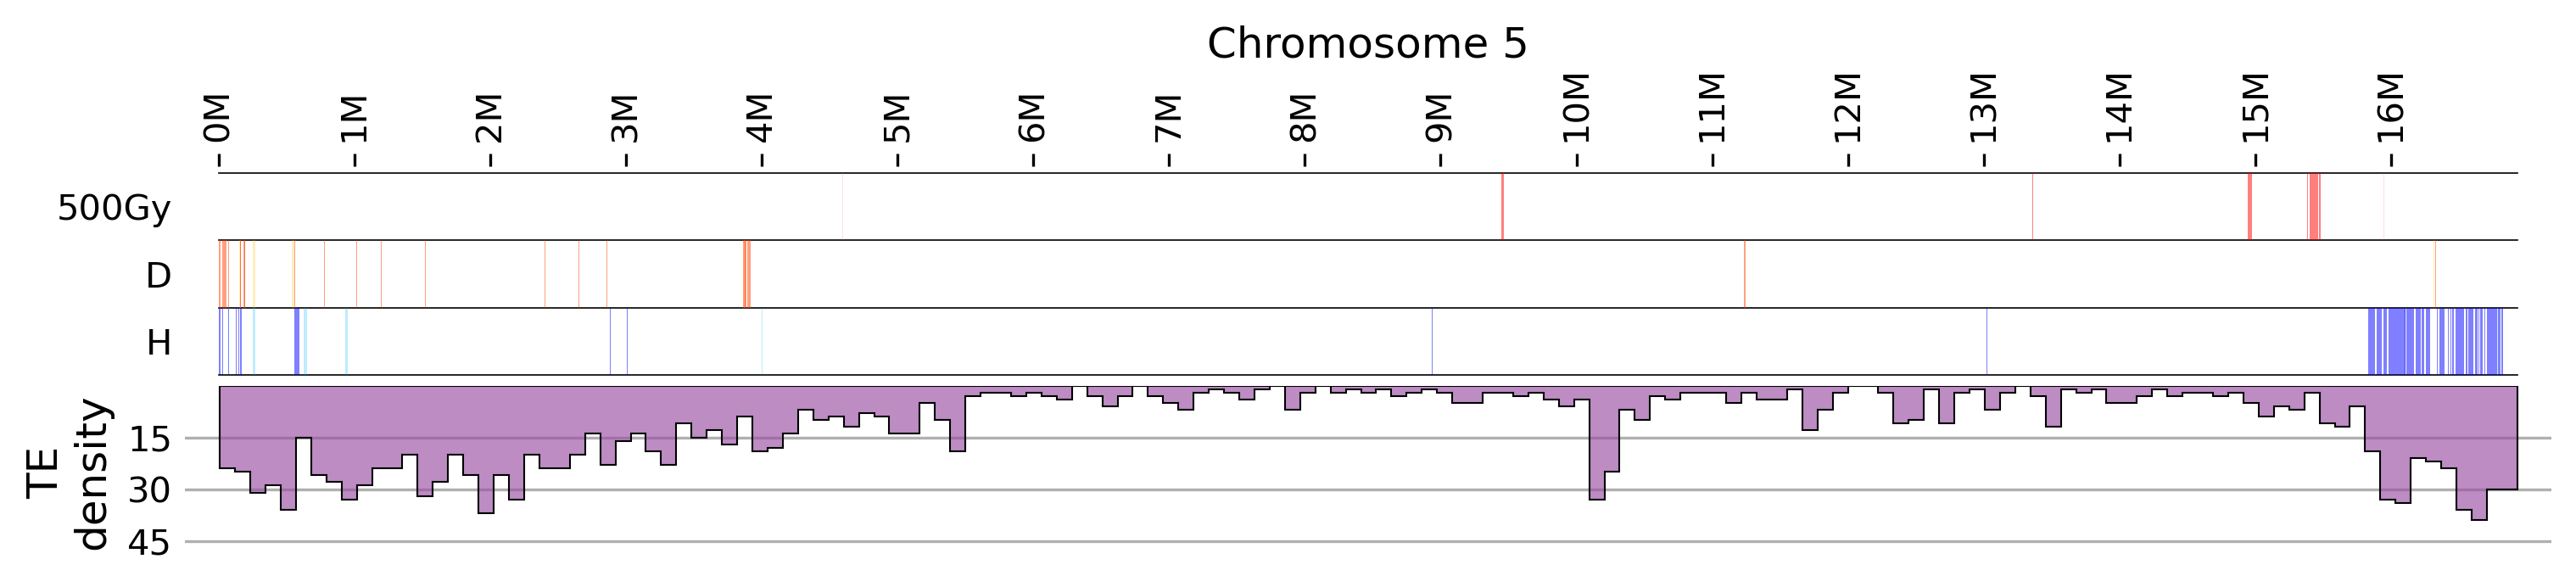

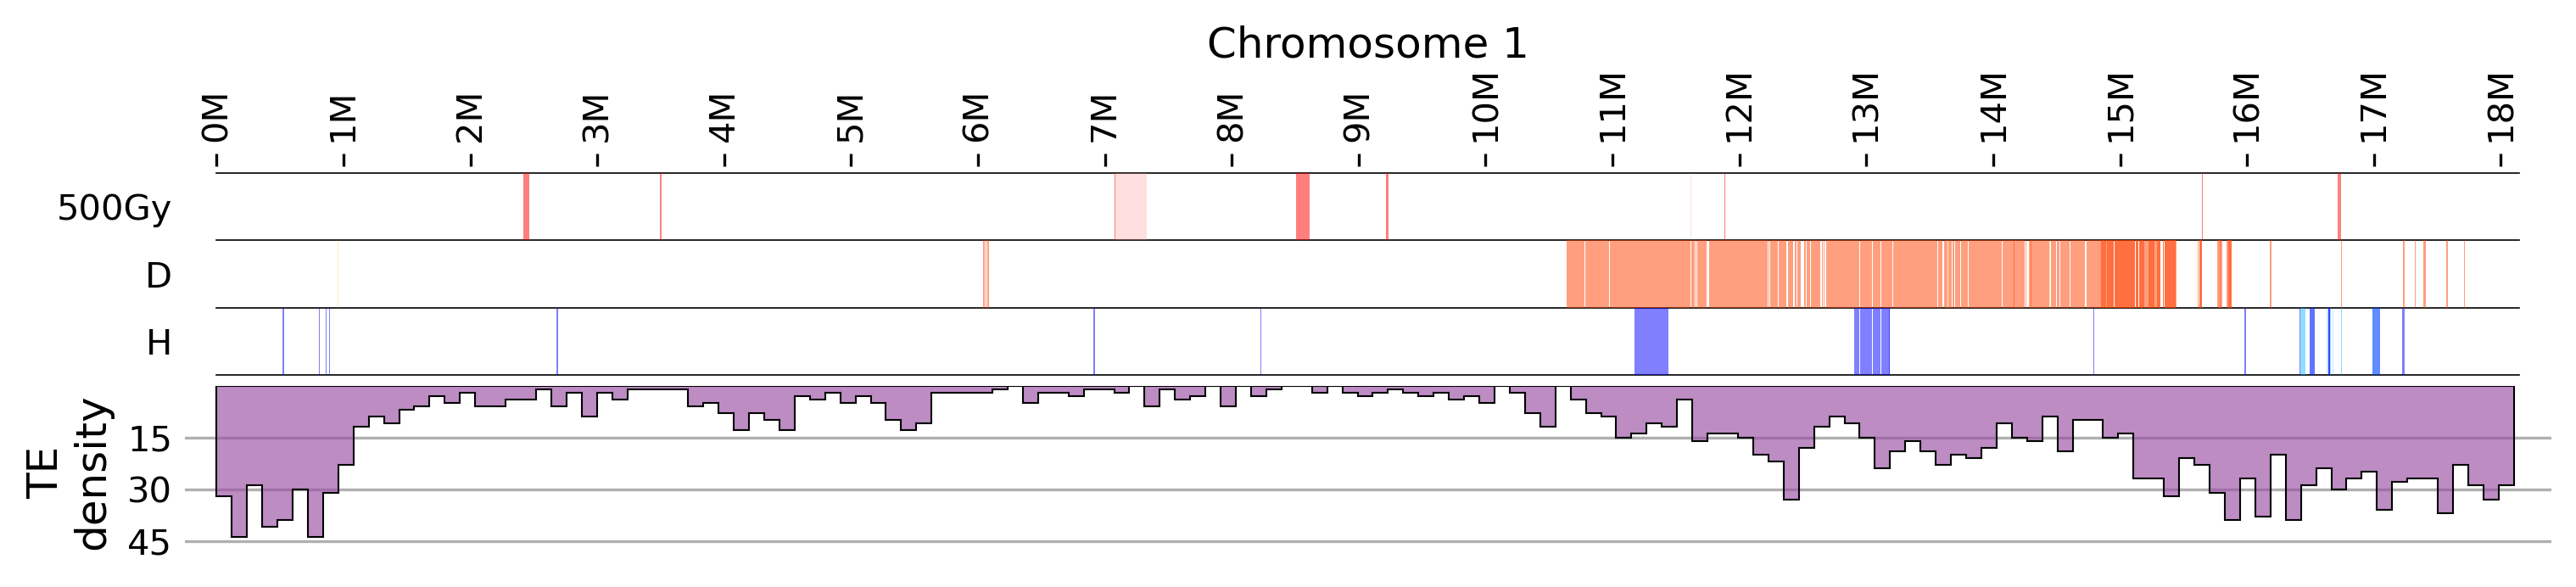

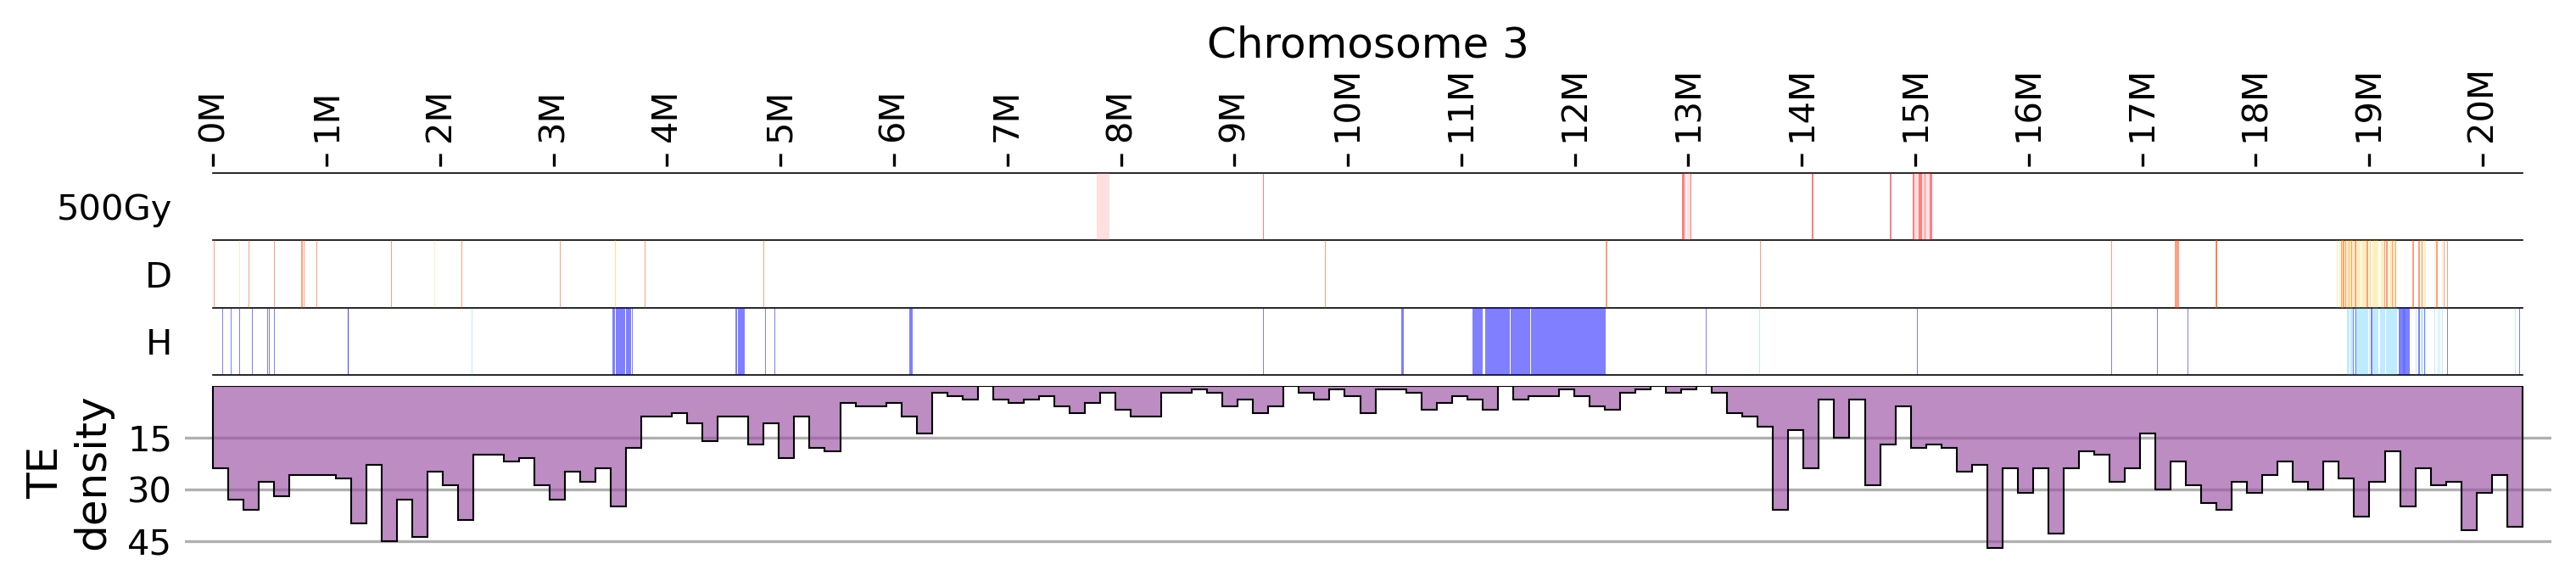

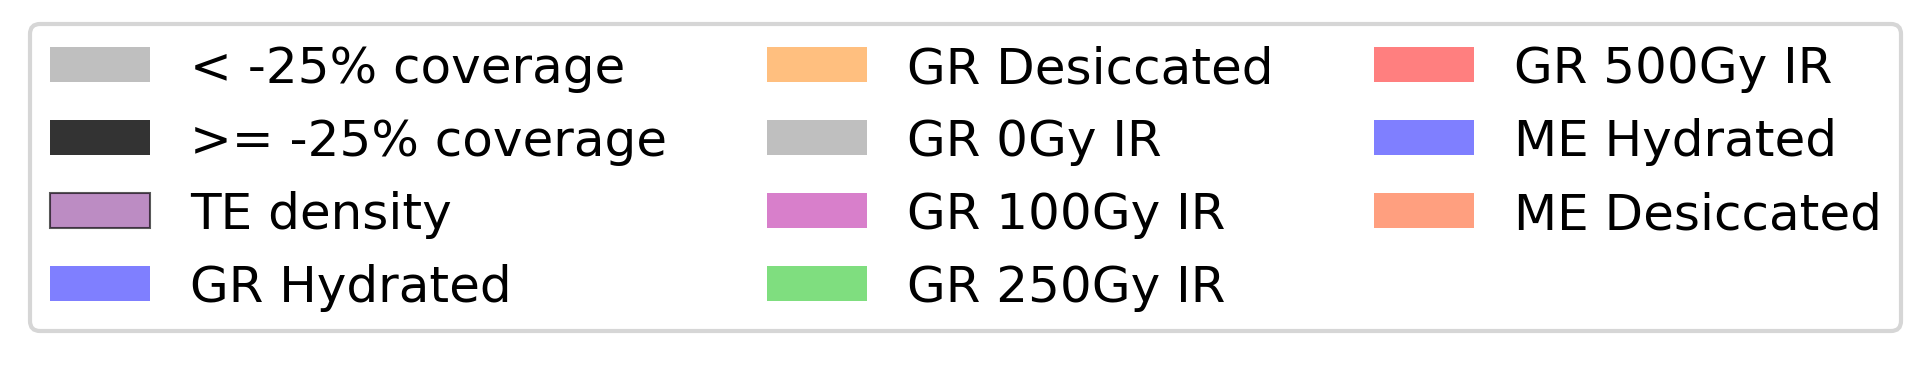

In [21]:
positions = {
    "Chrom_6":0,
    "Chrom_4":1,
    "Chrom_2":2,
    "Chrom_5":3,
    "Chrom_1":4,
    "Chrom_3":5,
}

ctgname = {
    "Chrom_6":"Chromosome 6",
    "Chrom_4":"Chromosome 4",
    "Chrom_2":"Chromosome 2",
    "Chrom_5":"Chromosome 5",
    "Chrom_1":"Chromosome 1",
    "Chrom_3":"Chromosome 3",
}

cond_y0 = {
    "H":-1,
    "D":0,
    "500Gy":1,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30H_del": (0.0,0.7,1.0,0.25), # turquoise
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "30D_del": (1.0,0.75,0.0,0.25), # orange
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "0Gy_del": (0.7,0.7,0.7,0.25), # lighter grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "100Gy_del": (1.0,0.0,0.8,0.25), # pinkish
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "250Gy_del": (0.0,1.0,0.0,0.25), # limegreen
    "500Gy": (1.0,0.0,0.0,0.5), # red
    "500Gy_del": (1.0,0.5,0.5,0.25), # pink
    "H": (0.0,0.0,1.0,0.5),
    "H_del": (0.0,0.7,1.0,0.25),
    "D": (1.0,0.25,0.0,0.5),
    "D_del": (1.0,0.75,0.0,0.25),
}

for ctg, i in positions.items() :
    
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(12,2), gridspec_kw={"height_ratios":[5,4]})
    
    patches = []
    rect = Rectangle((0,-1), lengths[ctg], 3)
    patches.append(rect)
    
    rectangles = PatchCollection(patches, facecolor="none", alpha=1, ec="k", lw=0.0, zorder=8)
    outline = PatchCollection(patches, facecolor="none", alpha=1, ec="k", lw=0.0, zorder=15)
    
    ax = axs[0]
    
    ax.add_collection(rectangles)
    ax.add_collection(outline)
    
    ax.set_ylim(-1.1,2.1)
    
    ax.set_yticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(ctgname[ctg], pad=-5.0)
    #ax.tick_params(axis='x', which='major', top=True, labeltop=True)
    ax.xaxis.tick_top()

    ax.set_xlim(-250000, lengths[ctg]+250000)
    #ax.axis('on')
    xticksval = [i for i in range(0, lengths[ctg], 1000000)]
    ax.set_xticks(xticksval)
    ax.set_xticklabels([str(int(i/1000000))+"M" for i in xticksval], rotation="vertical")

    for i in range(-3,6) :
        ax.plot([0, lengths[ctg]], [i,i], lw=0.4, color="k")
    
    #ax.yaxis.tick_right()
    ax.set_yticks([-0.5,0.5,1.5])
    ax.set_yticklabels(["H","D","500Gy"])
    ax.tick_params(axis="y", length=0.0)
    
    for sample, cdf in all_dfs.items() :
        if sample_cond[sample] not in ["H", "D", "500Gy"] :
            continue
            
        chrom = cdf.loc[cdf["CHROM_first"] == ctg]
        chrom = chrom.assign(OPER=chrom.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
        chrom = chrom.assign(APER=chrom.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
        chrom = chrom.assign(DIFF=chrom.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
        HR = chrom.query("DIFF >= -25")
        dele = chrom.query("DIFF < -25")
        
        # HR
        y0 = cond_y0[sample_cond[sample]]
        width = 1
        
        patches = []
        for n, row in HR.iterrows() :
            rect = Rectangle((row["POS_first"], y0), row["POS_last"]-row["POS_first"], width,)
            patches.append(rect)
            
        collection = PatchCollection(
            patches, facecolor=conditions_colors[sample_cond[sample]], 
            zorder=10, label="LOH"
        )
        ax.add_collection(collection)
        
        # Deletions
        patches = []
        for n, row in dele.iterrows() :
            rect = Rectangle((row["POS_first"], y0), row["POS_last"]-row["POS_first"], width,)
            patches.append(rect)
            
        collection = PatchCollection(
            patches, facecolor=conditions_colors[sample_cond[sample]+"_del"], 
            zorder=10, label="LOH"
        )
        ax.add_collection(collection)
        
    
    ax = axs[1]
    reps = repdf.loc[repdf["CHR"] == ctg]
    
    ax.hist(reps["START"], bins=151, ec="k", histtype="stepfilled", color=col_TE, lw=0.5, zorder=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.set_xlim(-250000, lengths[ctg]+250000)
    ax.set_xticks([])
    ax.set_ylim(0,50)
    ax.set_yticks([15,30,45])
    ax.set_ylabel("TE\ndensity", fontsize=12)
    
    ax.tick_params(axis='y', which='major', length=0)
    
    ax.yaxis.grid(True, zorder=1)
    plt.setp(ax.get_xticklabels(), visible=False)
    #ax.tick_params(axis='x', which='major', labelsize=0, length=0)
    plt.setp(ax.get_xticklines(), visible=False)
    
    #ax.set_facecolor([0.985,0.985,0.985])
    
    plt.gca().invert_yaxis()
    
    ax = axs[0]
    ax.spines["top"].set_linewidth(0)
    ax.spines["left"].set_linewidth(0)
    
    ax = axs[1]
    ax.spines["left"].set_linewidth(0)
    
    fig.subplots_adjust(hspace=0.02)
    plt.show()

fig, ax = plt.subplots()

legend_elements = [
    Patch(facecolor="k", alpha=0.25, label="< -25% coverage"),
    Patch(facecolor="k", alpha=0.8, label=">= -25% coverage"),
    Patch(facecolor=col_TE, lw=0.5, ec="k", alpha=0.65, label="TE density"),
]
legend_elements += [Patch(facecolor=conditions_colors[cond], alpha=0.5, label=name) for cond, name in conditions_names.items()]
#legend_elements += [Patch(facecolor=conditions_colors[cond+"_del"], alpha=0.5, label=name + "Deletion") for cond, name in conditions_names.items()]

fig.legend(handles=legend_elements, loc="upper center", fontsize=12, ncol=3)

ax.set_visible(False)

#for axis in ['top','bottom','left','right']:

plt.show()